In [1]:
import pandas as pd
import numpy as np
from IPython.display import Math #para escrever equações 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import seaborn as sns

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [3]:
from random import randint
from xmlrpc.client import Boolean
from tqdm import tqdm
import pandas as pd
import numpy as np
import quantecon as qe

import logging
log = logging.getLogger(__name__)
logging.basicConfig(level=logging.DEBUG) 


In [4]:
RANDOM_SIZE   = 1000000
RANDOM_SIZE   = 1003
# QTD_BINS      = 3
TEST_SIZE     = 0.05
RANDOM_STATE  = 2022

- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_commodity_types.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_vegetable_oil.csv
- https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv

# Mercado de Oleo

## Dataset Completo
USDA por comodity
USDA Agrupado por Oleo Vegetal
OECD Agrupado
FAO Index Price


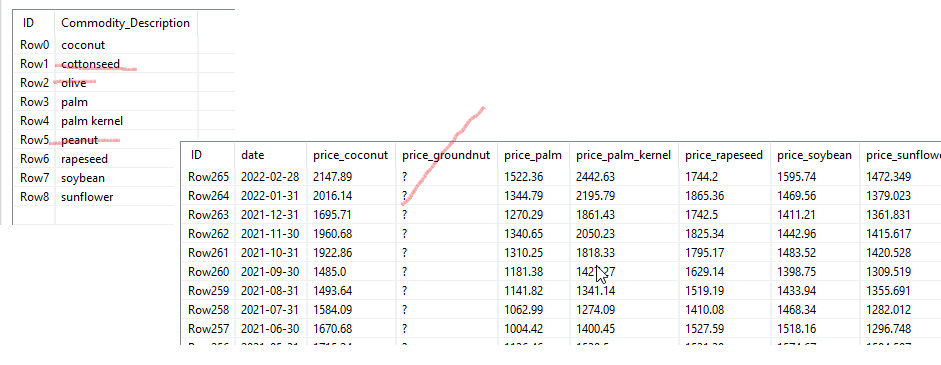

In [5]:

def get_dataset():
    df = pd.read_csv('https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/__by_month_full.csv')
    print(df.shape)
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by=['date'], ascending=[True], inplace=True)
    df.set_index(['date'], inplace=True)
    return df

%time df_full = get_dataset()
df_full.head()

(266, 139)
CPU times: total: 62.5 ms
Wall time: 470 ms


reference  price_index_fao  coconut_beginning_stocks  \
date                                                              
2000-01-31       NaN           48.583                       NaN   
2000-02-29       NaN           46.368                       NaN   
2000-03-31       NaN           47.819                       NaN   
2000-04-30       NaN           49.499                       NaN   
2000-05-31       NaN           44.489                       NaN   

            coconut_crush  coconut_domestic_consumption  \
date                                                      
2000-01-31            NaN                           NaN   
2000-02-29            NaN                           NaN   
2000-03-31            NaN                           NaN   
2000-04-30            NaN                           NaN   
2000-05-31            NaN                           NaN   

            coconut_ending_stocks  coconut_exports  \
date                                                 
2000-01-31                    NaN              NaN   
2000-02-29                    NaN              NaN   
2000-03-31                    NaN              NaN   
2000-04-30                    NaN              NaN   
2000-05-31                    NaN              NaN   

            coconut_feed_waste_dom_cons  coconut_food_use_dom_cons  \
date                                                                 
2000-01-31                          NaN                        NaN   
2000-02-29                          NaN                        NaN   
2000-03-31                          NaN                        NaN   
2000-04-30                          NaN                        NaN   
2000-05-31                          NaN                        NaN   

            coconut_imports  ...  palm_kernel_domestic_consumption  \
date                         ...                                     
2000-01-31              NaN  ...                               NaN   
2000-02-29              NaN  ...                               NaN   
2000-03-31              NaN  ...                               NaN   
2000-04-30              NaN  ...                               NaN   
2000-05-31              NaN  ...                               NaN   

            palm_kernel_ending_stocks  palm_kernel_exports  \
date                                                         
2000-01-31                        NaN                  NaN   
2000-02-29                        NaN                  NaN   
2000-03-31                        NaN                  NaN   
2000-04-30                        NaN                  NaN   
2000-05-31                        NaN                  NaN   

            palm_kernel_feed_waste_dom_cons  palm_kernel_food_use_dom_cons  \
date                                                                         
2000-01-31                              NaN                            NaN   
2000-02-29                              NaN                            NaN   
2000-03-31                              NaN                            NaN   
2000-04-30                              NaN                            NaN   
2000-05-31                              NaN                            NaN   

            palm_kernel_imports  palm_kernel_industrial_dom_cons  \
date                                                               
2000-01-31                  NaN                              NaN   
2000-02-29                  NaN                              NaN   
2000-03-31                  NaN                              NaN   
2000-04-30                  NaN                              NaN   
2000-05-31                  NaN                              NaN   

            palm_kernel_production  palm_kernel_total_distribution  \
date                                                                 
2000-01-31                     NaN                             NaN   
2000-02-29                     NaN                             NaN   
2000-03-31                 

In [6]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2000-01-31 to 2022-02-28
Columns: 138 entries, reference to palm_kernel_total_supply
dtypes: float64(137), object(1)
memory usage: 288.9+ KB


In [7]:
df_full.dtypes

reference                           object
price_index_fao                    float64
coconut_beginning_stocks           float64
coconut_crush                      float64
coconut_domestic_consumption       float64
                                    ...   
palm_kernel_imports                float64
palm_kernel_industrial_dom_cons    float64
palm_kernel_production             float64
palm_kernel_total_distribution     float64
palm_kernel_total_supply           float64
Length: 138, dtype: object

In [8]:
features = [x for x in df_full.columns if ('exports' in x or 'production' in x or 'price' in x) and not ('olive' in x or 'cottonseed' in x) ]
prices = [x for x in df_full.columns if 'price' in x and 'groundnut' not in x  ]
print(len(features), features)
print(len(prices), prices)

26 ['price_index_fao', 'coconut_exports', 'coconut_price', 'coconut_production', 'palm kernel_price', 'palm_exports', 'palm_price', 'palm_production', 'peanut_exports', 'peanut_price', 'peanut_production', 'rapeseed_exports', 'rapeseed_price', 'rapeseed_production', 'soybean_exports', 'soybean_price', 'soybean_production', 'sunflower_exports', 'sunflower_price', 'sunflower_production', 'vegetable_oil_exports_usda', 'vegetable_oil_production_usda', 'vegetable_oils_exports_oecd', 'vegetable_oils_production_oecd', 'palm_kernel_exports', 'palm_kernel_production']
8 ['price_index_fao', 'coconut_price', 'palm kernel_price', 'palm_price', 'peanut_price', 'rapeseed_price', 'soybean_price', 'sunflower_price']


In [9]:
df = df_full[features]
print(df.shape)
df = df[df['sunflower_production'].notnull()]
df = df[df['sunflower_price'].notnull()]
print(df.shape)
df

(266, 26)
(234, 26)


price_index_fao  coconut_exports  coconut_price  \
date                                                          
2002-02-28           47.786          148.440        376.000   
2002-03-31           47.622          148.040        366.000   
2002-04-30           48.969          147.640        411.000   
2002-05-31           51.641          147.240        420.000   
2002-06-30           55.804          146.830        446.000   
...                     ...              ...            ...   
2021-08-31          165.862          157.080       1493.640   
2021-09-30          168.571          158.080       1485.000   
2021-10-31          184.837          159.080       1922.860   
2021-11-30          184.555          160.080       1960.680   
2021-12-31          178.505          161.080       1695.710   

            coconut_production  palm kernel_price  palm_exports  palm_price  \
date                                                                          
2002-02-28             255.940            356.000      1527.920     352.980   
2002-03-31             255.830            353.240      1543.880     359.000   
2002-04-30             255.720            405.000      1559.830     360.070   
2002-05-31             255.610            418.300      1575.790     384.910   
2002-06-30             255.500            439.000      1591.750     426.130   
...                        ...                ...           ...         ...   
2021-08-31             290.610           1341.140      4092.220    1141.820   
2021-09-30             291.080           1427.270      4103.190    1181.380   
2021-10-31             291.560           1818.330      4114.150    1310.250   
2021-11-30             292.030           2050.230      4125.120    1340.650   
2021-12-31             292.500           1861.430      4136.080    1270.290   

            palm_production  peanut_exports  peanut_price  ...  \
date                                                       ...   
2002-02-28         2146.310          17.030       617.290  ...   
2002-03-31         2162.830          16.580       598.920  ...   
2002-04-30         2179.360          16.140       590.240  ...   
2002-05-31         2195.890          15.690       599.560  ...   
2002-06-30         2212.420          15.250       645.950  ...   
...                     ...             ...           ...  ...   
2021-08-31         6229.440          35.640           NaN  ...   
2021-09-30         6246.960          35.020           NaN  ...   
2021-10-31         6264.470          34.400           NaN  ...   
2021-11-30         6281.990          33.780           NaN  ...   
2021-12-31         6299.500          33.170           NaN  ...   

            soybean_production  sunflower_exports  sunflower_price  \
date                                                                 
2002-02-28            3204.320            166.180          578.000   
2002-03-31            3222.400            168.850          557.000   
2002-04-30            3240.470            171.530          552.000   
2002-05-31            3258.550            174.200          574.000   
2002-06-30            3276.620            176.880          595.000   
...                        ...                ...              ...   
2021-08-31            6354.170            988.220         1355.691   
2021-09-30            6350.750            994.670         1309.519   
2021-10-31            6347.330           1001.110         1420.528   
2021-11-30            6343.920           1007.560         1415.617   
2021-12-31            6340.500           1014.000         1361.831   

            sunflower_production  vegetable_oil_exports_usda  \
date                                                           
2002-02-28               620.920                    3312.180   
2002-03-31               625.580                    3339.800   
2002-04-30               630.250                    3367.440   
2002-05-31               634.920                    3395.080   
2002-06-30

In [10]:
df.describe()

price_index_fao  coconut_exports  coconut_price  coconut_production  \
count          234.000          234.000        234.000             234.000   
mean           103.046          154.793       1037.208             277.760   
std             32.741           10.334        412.612              12.313   
min             47.622          123.000        366.000             248.500   
25%             78.436          148.055        702.250             270.998   
50%             97.910          154.895        953.500             275.410   
75%            121.403          160.400       1387.287             287.767   
max            184.837          177.920       2256.000             302.500   

       palm kernel_price  palm_exports  palm_price  palm_production  \
count            234.000       234.000     234.000          234.000   
mean             956.092      3226.635     763.075         4406.418   
std              378.930       805.918     244.906         1262.844   
min              353.240      1527.920     352.980         2146.310   
25%              655.290      2515.020     577.495         3275.315   
50%              878.330      3399.860     732.000         4468.605   
75%             1232.705      4014.682     886.188         5503.118   
max             2307.630      4325.500    1377.220         6299.500   

       peanut_exports  peanut_price  ...  soybean_production  \
count         234.000       221.000  ...             234.000   
mean           19.901      1483.936  ...            4857.446   
std             6.470       383.791  ...             980.073   
min            12.830       590.240  ...            3204.320   
25%            15.468      1287.500  ...            4057.825   
50%            16.805      1404.950  ...            4667.785   
75%            23.133      1633.340  ...            5831.602   
max            40.580      2502.250  ...            6381.500   

       sunflower_exports  sunflower_price  sunflower_production  \
count            234.000          234.000               234.000   
mean             563.021          966.043              1174.819   
std              284.888          334.951               331.668   
min              166.180          543.000               620.920   
25%              329.412          719.643               886.732   
50%              493.780          856.470              1127.385   
75%              867.900         1174.505              1528.378   
max             1122.670         2045.000              1761.580   

       vegetable_oil_exports_usda  vegetable_oil_production_usda  \
count                     234.000                        234.000   
mean                     5990.575                      14277.728   
std                      1329.965                       3166.837   
min                      3312.180                       8559.630   
25%                      5027.562                      11538.903   
50%                      5927.510                      14325.960   
75%                      7278.573                      17158.577   
max                      7887.340                      19012.500   

       vegetable_oils_exports_oecd  vegetable_oils_production_oecd  \
count                      234.000                         234.000   
mean                      5545.769                       13471.372   
std                       1307.176                        3118.232   
min                       2986.310                        7954.130   
25%                       4463.065                       10815.903   
50%                       5663.720                       13418.630   
75%                       6772.868                       16394.708   
max                       7349.260                       18307.580   

       palm_kernel_exports  palm_kernel_production  
count              234.000                 234.000  
mean               233.840                 523.365  
std                 41.691                 139.269  
min                130.470 

## Correlação

Paired density and scatterplot matrix

https://seaborn.pydata.org/examples/pair_grid_with_kde.html

In [11]:
if False:
    %time
    sns.set_theme(style="white")

    g = sns.PairGrid(df, diag_sharey=False)
    g.map_upper(sns.scatterplot, s=15)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=2)

![Alt text](https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/images/Compare.png)

## Dendograma

In [12]:
if False:
    plt.figure(figsize=(25,10))
    dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

    plt.title('Dendrogram')

    # plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    %time plt.show()

# Markov

In [13]:
!pip install --upgrade quantecon numba tqdm

In [14]:
df.tail()

price_index_fao  coconut_exports  coconut_price  \
date                                                          
2021-08-31          165.862          157.080       1493.640   
2021-09-30          168.571          158.080       1485.000   
2021-10-31          184.837          159.080       1922.860   
2021-11-30          184.555          160.080       1960.680   
2021-12-31          178.505          161.080       1695.710   

            coconut_production  palm kernel_price  palm_exports  palm_price  \
date                                                                          
2021-08-31             290.610           1341.140      4092.220    1141.820   
2021-09-30             291.080           1427.270      4103.190    1181.380   
2021-10-31             291.560           1818.330      4114.150    1310.250   
2021-11-30             292.030           2050.230      4125.120    1340.650   
2021-12-31             292.500           1861.430      4136.080    1270.290   

            palm_production  peanut_exports  peanut_price  ...  \
date                                                       ...   
2021-08-31         6229.440          35.640           NaN  ...   
2021-09-30         6246.960          35.020           NaN  ...   
2021-10-31         6264.470          34.400           NaN  ...   
2021-11-30         6281.990          33.780           NaN  ...   
2021-12-31         6299.500          33.170           NaN  ...   

            soybean_production  sunflower_exports  sunflower_price  \
date                                                                 
2021-08-31            6354.170            988.220         1355.691   
2021-09-30            6350.750            994.670         1309.519   
2021-10-31            6347.330           1001.110         1420.528   
2021-11-30            6343.920           1007.560         1415.617   
2021-12-31            6340.500           1014.000         1361.831   

            sunflower_production  vegetable_oil_exports_usda  \
date                                                           
2021-08-31              1703.690                    7821.270   
2021-09-30              1717.600                    7837.790   
2021-10-31              1731.510                    7854.300   
2021-11-30              1745.420                    7870.820   
2021-12-31              1759.330                    7887.340   

            vegetable_oil_production_usda  vegetable_oils_exports_oecd  \
date                                                                     
2021-08-31                      18894.320                     7325.470   
2021-09-30                      18923.870                     7328.510   
2021-10-31                      18953.420                     7331.560   
2021-11-30                      18982.970                     7334.600   
2021-12-31                      19012.500                     7337.650   

            vegetable_oils_production_oecd  palm_kernel_exports  \
date                                                              
2021-08-31                       18174.560              276.780   
2021-09-30                       18207.820              278.380   
2021-10-31                       18241.070              279.970   
2021-11-30                       18274.330              281.570   
2021-12-31                       18307.580              283.170   

            palm_kernel_production  
date                                
2021-08-31                 716.470  
2021-09-30                 718.600  
2021-10-31                 720.740  
2021-11-30                 722.870  
2021-12-31                 725.000  

[5 rows x 26 columns]

## Geração do Random Sets

In [15]:
def prepare_dataset(df: pd.DataFrame):
    df = df.copy()
    for col in df.columns:
        df[f'{col}_delta']    = df[col].diff()
        df[f'{col}_outcome']  = df[col].diff(-1) * -1
        df[f'{col}_mom']      = df[col].pct_change()

    columns = sorted(list(df.columns))
    return df[columns].reset_index()


df_m = prepare_dataset(df)
df_m.tail(10).T

224  \
date                                    2021-03-31 00:00:00   
coconut_exports                                     152.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.007   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.050   
vegetable_oils_production_oecd                    18008.290   
vegetable_oils_production_oecd_delta                 33.250   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.260   

                                                        225  \
date                                    2021-04-30 00:00:00   
coconut_exports                                     153.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.007   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.040   
vegetable_oils_production_oecd                    18041.550   
vegetable_oils_production_oecd_delta                 33.260   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.250   

                                                        226  \
date                                    2021-05-31 00:00:00   
coconut_exports                                     154.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.007   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.050   
vegetable_oils_production_oecd                    18074.800   
vegetable_oils_production_oecd_delta                 33.250   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.260   

                                                        227  \
date                                    2021-06-30 00:00:00   
coconut_exports                                     155.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.006   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.040   
vegetable_oils_production_oecd                    18108.060   
vegetable_oils_production_oecd_delta                 33.260   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.250   

                                                        228  \
date                                    2021-07-31 00:00:00   
coconut_exports                                     156.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom                                   0.006   
coconut_exports_outcome                               1.000   
...                                                     ...   
vegetable_oils_exports_oecd_outcome                   3.050   
vegetable_oils_production_oecd                    18141.310   
vegetable_oils_production_oecd_delta                 33.250   
vegetable_oils_production_oecd_mom                    0.002   
vegetable_oils_production_oecd_outcome               33.250   

                                                        229  \
date                                    2021-08-31 00:00:00   
coconut_exports                                     157.080   
coconut_exports_delta                                 1.000   
coconut_exports_mom

In [16]:
df_m.tail()

date  coconut_exports  coconut_exports_delta  coconut_exports_mom  \
229 2021-08-31          157.080                  1.000                0.006   
230 2021-09-30          158.080                  1.000                0.006   
231 2021-10-31          159.080                  1.000                0.006   
232 2021-11-30          160.080                  1.000                0.006   
233 2021-12-31          161.080                  1.000                0.006   

     coconut_exports_outcome  coconut_price  coconut_price_delta  \
229                    1.000       1493.640              -90.450   
230                    1.000       1485.000               -8.640   
231                    1.000       1922.860              437.860   
232                    1.000       1960.680               37.820   
233                      NaN       1695.710             -264.970   

     coconut_price_mom  coconut_price_outcome  coconut_production  ...  \
229             -0.057                 -8.640             290.610  ...   
230             -0.006                437.860             291.080  ...   
231              0.295                 37.820             291.560  ...   
232              0.020               -264.970             292.030  ...   
233             -0.135                    NaN             292.500  ...   

     vegetable_oil_production_usda_mom  vegetable_oil_production_usda_outcome  \
229                              0.002                                 29.550   
230                              0.002                                 29.550   
231                              0.002                                 29.550   
232                              0.002                                 29.530   
233                              0.002                                    NaN   

     vegetable_oils_exports_oecd  vegetable_oils_exports_oecd_delta  \
229                     7325.470                              3.050   
230                     7328.510                              3.040   
231                     7331.560                              3.050   
232                     7334.600                              3.040   
233                     7337.650                              3.050   

     vegetable_oils_exports_oecd_mom  vegetable_oils_exports_oecd_outcome  \
229                            0.000                                3.040   
230                            0.000                                3.050   
231                            0.000                                3.040   
232                            0.000                                3.050   
233                            0.000                                  NaN   

     vegetable_oils_production_oecd  vegetable_oils_production_oecd_delta  \
229                       18174.560                                33.250   
230                       18207.820                                33.260   
231                       18241.070                                33.250   
232                       18274.330                                33.260   
233                       18307.580                                33.250   

     vegetable_oils_production_oecd_mom  \
229                               0.002   
230                               0.002   
231                               0.002   
232                               0.002   
233                               0.002   

     vegetable_oils_production_oecd_outcome  
229                                  33.260  
230                                  33.250  
231                                  33.260  
232                                  33.250  
233                                     NaN  

[5 rows x 105 columns]

In [17]:
def get_random_sets(input_dataframe: pd.DataFrame, 
                    size = 100000,
                    **kwargs):
    
    # take random sets of sequential rows 
    new_set = []

    # breakpoint()
    
    log.debug(f'AQUI:   {size}')
    for row_set in (tqdm(iterable = range(0, size), bar_format='{desc:<15}{percentage:3.0f}%|{bar:50}{r_bar}' ) ):
        
        # obtem de forma randomica uma amostra de n linhas do dataset
        # entre 3 e 18 meses
        row_quant     = randint(3, 18)
        row_start     = randint(0, len(input_dataframe) - row_quant)
        row_finish    = row_start + row_quant
        
        market_subset = input_dataframe.iloc[row_start:row_finish]

        # log.debug(f'AQUI:   {row_start} |{row_finish} | {market_subset.shape}')
        
        Close_Date    = max(market_subset['date'])
        

        if row_set%(size//5)==0:
            pass
            print(f'row_set: {row_set:<6} | row_quant: {row_quant:2} | rows: {row_start:>6}-{row_finish-1:<6} | market_subset: {str(market_subset.shape):^10} | Close_Date: {Close_Date:%m/%d/%Y}')
        
        ref = {}
        ref['Sequence_ID']  = [row_set]*len(market_subset)          # poderia ser 'row_quant' ao inves de 'len(market_subset)'
        ref['Close_Date']   = [Close_Date]*len(market_subset)
        ref['ref_date']   = market_subset['date']
        
        columns_ref = {}
        
        if 'columns' in kwargs and isinstance(kwargs['columns'], list):
            for _col in kwargs['columns']:
                if _col in input_dataframe.columns:
                    columns_ref[_col] = market_subset[_col]
                    columns_ref[f'{_col}_variation'] = market_subset[_col].pct_change()
                    
                    if 'outcomes' in kwargs and isinstance(kwargs['outcomes'], list) and _col in kwargs['outcomes']:
                        columns_ref[f'{_col}_outcome'] = market_subset[_col].diff(-1) * -1
            
        
        if 'bypass' in kwargs and isinstance(kwargs['bypass'], list):
            for _col in kwargs['bypass']:
                columns_ref[_col] = market_subset[_col]
               
        # columns_ref = dict( sorted(columns_ref.items(), key=lambda x: x[0].lower()) )
        
        #merge dictionaries
        ref = {**ref, **columns_ref}
        
        new_set.append(pd.DataFrame(ref))
        
    return new_set

# get_random_sets(df_m, RANDOM_SIZE)

In [18]:
%time my_set_case1 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

DEBUG:__main__:AQUI:   1003
                 1%|▎                                                 | 6/1003 [00:00<00:17, 55.56it/s]

row_set: 0      | row_quant:  6 | rows:     46-51     | market_subset:  (6, 27)   | Close_Date: 10/31/2006


                21%|██████████▌                                       | 213/1003 [00:03<00:12, 62.50it/s]

row_set: 200    | row_quant: 15 | rows:     62-76     | market_subset:  (15, 27)  | Close_Date: 11/30/2008


                41%|████████████████████▌                             | 412/1003 [00:06<00:11, 52.50it/s]

row_set: 400    | row_quant: 17 | rows:    109-125    | market_subset:  (17, 27)  | Close_Date: 12/31/2012


                61%|██████████████████████████████▎                   | 608/1003 [00:10<00:06, 62.19it/s]

row_set: 600    | row_quant:  5 | rows:    136-140    | market_subset:  (5, 27)   | Close_Date: 03/31/2014


                81%|████████████████████████████████████████▎         | 809/1003 [00:13<00:04, 45.93it/s]

row_set: 800    | row_quant: 12 | rows:    104-115    | market_subset:  (12, 27)  | Close_Date: 02/29/2012


               100%|██████████████████████████████████████████████████| 1003/1003 [00:17<00:00, 57.29it/s]

row_set: 1000   | row_quant: 11 | rows:     23-33     | market_subset:  (11, 27)  | Close_Date: 04/30/2005
CPU times: total: 17.6 s
Wall time: 17.5 s


In [19]:
def convet_collection_to_dataframe(collection):
    """
    Concatena todas as colecoes
    Remove os np.inf e np.nan, gerados pelo pc_c
    """
    df_out = pd.concat(collection)
    
    log.debug(f'Before dropping NaNs: {df_out.shape}')
    df_out.replace([np.inf, -np.inf], np.nan, inplace=True)
    df_out = df_out.dropna(how='any') 
    log.debug(f'After dropping NaNs: {df_out.shape}')
    return df_out

In [20]:
%time df1 = convet_collection_to_dataframe(my_set_case1)
df1

DEBUG:__main__:Before dropping NaNs: (10551, 81)
DEBUG:__main__:After dropping NaNs: (8213, 81)


CPU times: total: 78.1 ms
Wall time: 101 ms


Sequence_ID Close_Date   ref_date  price_index_fao  \
47             0 2006-10-31 2006-06-30           67.937   
48             0 2006-10-31 2006-07-31           70.446   
49             0 2006-10-31 2006-08-31           73.546   
50             0 2006-10-31 2006-09-30           71.703   
164            1 2017-06-30 2016-03-31           97.343   
..           ...        ...        ...              ...   
165         1002 2016-09-30 2016-04-30          101.169   
166         1002 2016-09-30 2016-05-31           99.556   
167         1002 2016-09-30 2016-06-30           97.927   
168         1002 2016-09-30 2016-07-31           94.903   
169         1002 2016-09-30 2016-08-31          102.386   

     price_index_fao_variation  price_index_fao_outcome  coconut_exports  \
47                      -0.005                    2.509          157.960   
48                       0.037                    3.100          155.780   
49                       0.044                   -1.843          153.610   
50                      -0.025                    0.995          151.440   
164                      0.056                    3.826          135.830   
..                         ...                      ...              ...   
165                      0.039                   -1.613          137.280   
166                     -0.016                   -1.629          138.720   
167                     -0.016                   -3.024          140.170   
168                     -0.031                    7.483          141.610   
169                      0.079                    1.934          143.060   

     coconut_exports_variation  coconut_exports_outcome  coconut_price  ...  \
47                      -0.014                   -2.180        575.000  ...   
48                      -0.014                   -2.170        583.250  ...   
49                      -0.014                   -2.170        606.000  ...   
50                      -0.014                   -2.180        609.000  ...   
164                      0.011                    1.450       1440.480  ...   
..                         ...                      ...            ...  ...   
165                      0.011                    1.440       1580.950  ...   
166                      0.010                    1.450       1439.500  ...   
167                      0.010                    1.440       1547.950  ...   
168                      0.010                    1.450       1515.000  ...   
169                      0.010                    1.440       1575.000  ...   

     vegetable_oils_exports_oecd_outcome  vegetable_oils_production_oecd  \
47                                 7.780                       10404.080   
48                                 7.790                       10429.900   
49                                 7.780                       10455.720   
50                                 7.790                       10481.550   
164                               48.140                       15286.610   
..                                   ...                             ...   
165                               48.130                       15393.330   
166                               48.130                       15500.050   
167                               48.140                       15606.780   
168                               48.130                       15713.500   
169                               48.140                       15820.230   

     vegetable_oils_production_oecd_variation  \
47                                      0.002   
48                                      0.002   
49                                      0.002   
50                                      0.002   
164                                     0.007   
..                                        ...   
165                                     0.007   
166                                     0.007   
167                                     0.007   
168                            

In [21]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['price_index_fao_outcome',
 'coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm kernel_price_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable_oil_exports_usda_outcome',
 'vegetable_oil_production_usda_outcome',
 'vegetable_oils_exports_oecd_outcome',
 'vegetable_oils_production_oecd_outcome',
 'palm_kernel_exports_outcome',
 'palm_kernel_production_outcome']

## Divisao em Quantis

In [22]:
get_divison = lambda size: [item / size for item in list(range(size + 1))]
get_labels = lambda size, start=0: [f'{chr( (item % 26 + start) + 65  )}{ "" if item // 26 <= 0 else item // 26 }' for item in list(range(size))]
get_full = lambda size: [ (chr(i + 65), f'{j / size} < x <= { (j+1) / size}' ) for i , j in enumerate(range(size))]
get_bins = lambda _input_array, size:  np.round(np.linspace(_input_array.min(), _input_array.max(), size + 1), 6).tolist()


def read_kwarg_list(kwargs, name, _else_conditions = None):
    if name in kwargs and isinstance(kwargs[name], list):
        return kwargs[name]
    return _else_conditions

def read_kwarg_bool(kwargs, name):
    if name in kwargs and isinstance(kwargs[name], Boolean):
        return kwargs[name]
    return False
        

In [23]:
get_labels(3, 10)

['K', 'L', 'M']

In [24]:
get_labels(3)

['A', 'B', 'C']

In [25]:
def quantiles_v1(df: pd.DataFrame, labels: list):
    df    = df.copy()
    ref   = ''.join(labels).lower()
    size  = len(labels)

    columns_labels = []
    for col in df.columns:
        if 'variation' in col:
            column_name         = f'{col}_qcut'
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_labels.append(column_name)

    equation = ' + '.join( [f'df["{col}"].astype(str)' for col in columns_labels] )
    df['event_pattern']  = eval(equation) 
    columns_labels.append('event_pattern')

    return df
    return df[['Sequence_ID','Close_Date'] + columns_labels]
    

In [26]:
df2 = quantiles_v1(df1, ['L','M','H'])
print(df2.shape)
df2.tail()

(8213, 108)


Sequence_ID Close_Date   ref_date  price_index_fao  \
165         1002 2016-09-30 2016-04-30          101.169   
166         1002 2016-09-30 2016-05-31           99.556   
167         1002 2016-09-30 2016-06-30           97.927   
168         1002 2016-09-30 2016-07-31           94.903   
169         1002 2016-09-30 2016-08-31          102.386   

     price_index_fao_variation  price_index_fao_outcome  coconut_exports  \
165                      0.039                   -1.613          137.280   
166                     -0.016                   -1.629          138.720   
167                     -0.016                   -3.024          140.170   
168                     -0.031                    7.483          141.610   
169                      0.079                    1.934          143.060   

     coconut_exports_variation  coconut_exports_outcome  coconut_price  ...  \
165                      0.011                    1.440       1580.950  ...   
166                      0.010                    1.450       1439.500  ...   
167                      0.010                    1.440       1547.950  ...   
168                      0.010                    1.450       1515.000  ...   
169                      0.010                    1.440       1575.000  ...   

     sunflower_exports_variation_qcut  sunflower_price_variation_qcut  \
165                                 H                               H   
166                                 H                               M   
167                                 H                               L   
168                                 H                               L   
169                                 H                               M   

     sunflower_production_variation_qcut  \
165                                    H   
166                                    H   
167                                    H   
168                                    H   
169                                    H   

     vegetable_oil_exports_usda_variation_qcut  \
165                                          H   
166                                          H   
167                                          H   
168                                          H   
169                                          H   

     vegetable_oil_production_usda_variation_qcut  \
165                                             H   
166                                             H   
167                                             H   
168                                             H   
169                                             H   

     vegetable_oils_exports_oecd_variation_qcut  \
165                                           H   
166                                           H   
167                                           H   
168                                           H   
169                                           H   

     vegetable_oils_production_oecd_variation_qcut  \
165                                              H   
166                                              H   
167                                              H   
168                                              H   
169                                              H   

     palm_kernel_exports_variation_qcut  \
165                                   M   
166                                   M   
167                                   M   
168                                   M   
169                                   M   

     palm_kernel_production_variation_qcut               event_pattern  
165                                      H  HHHMHHHHHHHMHLLHMHHHHHHHMH  
166                                      H  MHLMLHLHMMHMMLLMMHMHHHHHMH  
167                                      H  LHHMHHLHMHHMMLLMMHLHHHHHMH  
168                                      H  LHMMLHLHMHHMLLLMMHLHHHHHMH  
169                                      H  HHHMHHHHMHHMHLLHMHMHHHHHMH  

[5 rows x 108 columns]

In [27]:
outcomes

['price_index_fao_outcome',
 'coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm kernel_price_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable_oil_exports_usda_outcome',
 'vegetable_oil_production_usda_outcome',
 'vegetable_oils_exports_oecd_outcome',
 'vegetable_oils_production_oecd_outcome',
 'palm_kernel_exports_outcome',
 'palm_kernel_production_outcome']

## Compressing

In [28]:
def compress_v1(input_dataframe: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    if columns and 'event_pattern' in input_dataframe.columns:
        df_step1 = input_dataframe.groupby(columns)['event_pattern'].apply(lambda x: ','.join(x)).reset_index()
        
    if columns and outcomes:
        df_step2 = input_dataframe.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on= columns, how='inner')
    
    return compressed_set

In [29]:
df3 = compress_v1(df2, columns = ['Sequence_ID', 'Close_Date'],  outcomes = outcomes)
print(df3.shape)
df3.tail()

(982, 29)


Sequence_ID Close_Date  \
977          998 2014-05-31   
978          999 2003-09-30   
979         1000 2005-04-30   
980         1001 2005-05-31   
981         1002 2016-09-30   

                                         event_pattern  \
977  LMLLMLLMHMHLLMMLMHLHLHMMLM,LMHLHLMMHLHLMMMMMHL...   
978                         LMLMLHLHHHHHLHMLLMLHHHMHHH   
979  LHMHMHLHLLLLLHMHHLMLHHHHHH,MHLHMHMHLLLLHHMMHLM...   
980                         LMLLLHMMHLMHLHMMHHLHHHHHMM   
981  HHHMHHHHHHHMHLLHMHHHHHHHMH,MHLMLHLHMMHMMLLMMHM...   

     price_index_fao_outcome  coconut_exports_outcome  coconut_price_outcome  \
977                    0.296                    0.056                 55.282   
978                    2.246                    0.360                 10.000   
979                    0.028                    1.053                  1.111   
980                   -0.848                   -0.210                -32.000   
981                    0.630                    1.444                 -4.712   

     coconut_production_outcome  palm kernel_price_outcome  \
977                      -0.861                     41.971   
978                       0.710                     27.790   
979                       0.379                      5.178   
980                      -0.490                    -36.240   
981                       0.556                     28.962   

     palm_exports_outcome  palm_price_outcome  ...  \
977                15.000               7.133  ...   
978                15.860               1.550  ...   
979                19.036               0.343  ...   
980                14.750              -7.860  ...   
981                35.952               4.570  ...   

     soybean_production_outcome  sunflower_exports_outcome  \
977                      30.649                      6.594   
978                      -0.450                      2.530   
979                      21.254                      3.754   
980                      18.610                      9.340   
981                      15.014                     17.910   

     sunflower_price_outcome  sunflower_production_outcome  \
977                  -25.937                         7.302   
978                    2.000                         7.610   
979                    7.889                         4.551   
980                    5.000                         9.560   
981                   -2.044                        19.660   

     vegetable_oil_exports_usda_outcome  \
977                              36.632   
978                              25.920   
979                              33.678   
980                              33.860   
981                              52.960   

     vegetable_oil_production_usda_outcome  \
977                                 65.666   
978                                 48.170   
979                                 62.966   
980                                 56.190   
981                                 84.144   

     vegetable_oils_exports_oecd_outcome  \
977                               25.046   
978                               16.010   
979                               30.291   
980                               34.390   
981                               48.134   

     vegetable_oils_production_oecd_outcome  palm_kernel_exports_outcome  \
977                                  62.135                       -0.066   
978                                  42.310                        1.160   
979                                  64.297                        1.524   
980                                  45.050                        1.040   
981                                 106.724                        0.486   

     palm_kernel_production_outcome  
977                           2.239  
978                           2.180  
979                           2.712  
980                           1.800  
981                           4.208  

[5 rows x 29 columns]

In [30]:
df3.columns

Index(['Sequence_ID', 'Close_Date', 'event_pattern', 'price_index_fao_outcome',
       'coconut_exports_outcome', 'coconut_price_outcome',
       'coconut_production_outcome', 'palm kernel_price_outcome',
       'palm_exports_outcome', 'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable_oil_exports_usda_outcome',
       'vegetable_oil_production_usda_outcome',
       'vegetable_oils_exports_oecd_outcome',
       'vegetable_oils_production_oecd_outcome', 'palm_kernel_exports_outcome',
       'palm_kernel_production_outcome'],
      dtype='object')

## Simplificando o Dataset

In [31]:
df3[outcomes].describe()

price_index_fao_outcome  coconut_exports_outcome  \
count                  982.000                  982.000   
mean                     0.364                    0.031   
std                      3.859                    1.492   
min                    -28.378                   -3.120   
25%                     -1.305                   -0.969   
50%                      0.176                    0.083   
75%                      1.738                    0.888   
max                     15.453                    4.130   

       coconut_price_outcome  coconut_production_outcome  \
count                982.000                     982.000   
mean                   6.806                       0.073   
std                   59.090                       0.950   
min                 -294.000                      -1.830   
25%                  -16.870                      -0.494   
50%                    4.361                      -0.032   
75%                   31.047                       0.847   
max                  323.000                       2.265   

       palm kernel_price_outcome  palm_exports_outcome  palm_price_outcome  \
count                    982.000               982.000             982.000   
mean                       5.475                10.711               2.659   
std                       61.762                13.662              29.515   
min                     -389.130               -24.320            -192.577   
25%                      -20.249                 3.431             -10.118   
50%                        3.178                14.234               1.361   
75%                       32.358                20.097              14.483   
max                      309.500                35.953             133.205   

       palm_production_outcome  peanut_exports_outcome  peanut_price_outcome  \
count                  982.000                 982.000               982.000   
mean                    16.969                   0.128                 2.328   
std                     13.173                   0.292                45.525   
min                    -22.310                  -0.828              -253.530   
25%                     13.111                  -0.039               -13.187   
50%                     19.750                   0.060                 0.711   
75%                     24.078                   0.204                25.240   
max                     44.480                   1.220               245.010   

       ...  soybean_production_outcome  sunflower_exports_outcome  \
count  ...                     982.000                    982.000   
mean   ...                      14.422                      3.651   
std    ...                      11.471                      7.064   
min    ...                     -16.860                    -15.500   
25%    ...                       9.341                     -0.268   
50%    ...                      14.378                      3.145   
75%    ...                      19.278                      8.210   
max    ...                      41.750                     17.910   

       sunflower_price_outcome  sunflower_production_outcome  \
count                  982.000                       982.000   
mean                     2.281                         4.412   
std                     45.185                         7.493   
min                   -363.000                       -14.100   
25%                    -10.298                         0.540   
50%                     -0.083                         4.076   
75%                     11.409                         9.490   
max                    212.740                        19.660   

       vegetable_oil_exports_usda_outcome  \
count                             982.000   
mean                               19.398   
std                                18.369   
min                               -28.240   
25%                                 7.873   
50%                                21.826

In [32]:
# df3[[x for x in df_full.columns if 'outcome' in x and 'prices' in x  ]].describe()

In [33]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = 'price_index_fao_outcome'

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 982
Relevant changes: 618


In [34]:
df4

Sequence_ID Close_Date  \
0              0 2006-10-31   
4              4 2008-08-31   
7              7 2019-03-31   
8              8 2021-07-31   
9              9 2016-07-31   
..           ...        ...   
971          992 2007-05-31   
973          994 2013-07-31   
974          995 2007-11-30   
976          997 2013-06-30   
978          999 2003-09-30   

                                         event_pattern  \
0    MLMLLLMLLHLHMLHHHMLMMMLLHL,HLMLMLHLLHLHMLHHHML...   
4    HHMHMHLHLHHLHMLHLLHLMMHMMH,HHMHMHHHLHHLHMLHLLH...   
7    MHLMLMMMMMLMLLMMMMMMHLMLHM,MHMMMMMMMMLMMLMMMMM...   
8    HLHMHLHLHHMMHMMHLLHLLLLLLL,HLLMLLHLHHMMHMMHLLH...   
9    LHMMHHMHHLHMLLLLMHLHHHHHMH,HHHMHHHHHLHMMLLHMHH...   
..                                                 ...   
971                         HHHHHHHHLHHLHHLHLLHLMMHHMH   
973  HHLHMHHHLMMLMMHHMLMLMLMLHH,HHMHMHHHLHMLMMHMMLH...   
974  HHHHHHMHLHHLHHLHLLHLMMHHMH,HHLHLHHHLHHLHHLHLLH...   
976  LHLHLMLHLMMLLMHLLLLLMLMLHH,HMMHMMHHLMMLHMHHLLH...   
978                         LMLMLHLHHHHHLHMLLMLHHHMHHH   

     price_index_fao_outcome  coconut_exports_outcome  coconut_price_outcome  \
0                      1.190                   -2.175                 12.750   
4                      1.902                   -1.648                 23.583   
7                     -1.412                    1.471                -36.673   
8                      7.058                   -0.576                 90.514   
9                      1.602                    1.445                 60.500   
..                       ...                      ...                    ...   
971                    7.494                    1.300                 66.500   
973                   -2.266                    0.216                -29.848   
974                    6.265                    1.290                 30.400   
976                   -1.215                    0.184                -13.947   
978                    2.246                    0.360                 10.000   

     coconut_production_outcome  palm kernel_price_outcome  \
0                        -1.827                      5.710   
4                         0.505                     13.356   
7                         0.078                    -30.123   
8                        -0.140                     69.772   
9                         0.557                     65.728   
..                          ...                        ...   
971                       2.260                     69.590   
973                       0.180                    -33.181   
974                       2.264                     29.334   
976                      -0.021                    -19.629   
978                       0.710                     27.790   

     palm_exports_outcome  palm_price_outcome  ...  \
0                   3.430               9.005  ...   
4                  21.142              11.077  ...   
7                  10.023             -11.098  ...   
8                  -2.714              52.264  ...   
9                  35.952              11.088  ...   
..                    ...                 ...  ...   
971                28.480              72.640  ...   
973                12.909             -23.016  ...   
974                28.478              33.076  ...   
976                11.562             -12.572  ...   
978                15.860               1.550  ...   

     soybean_production_outcome  sunflower_exports_outcome  \
0                        19.278                      0.882   
4                        -9.933                      3.523   
7                        13.280                      9.568   
8                        11.680                    -15.500   
9                        15.013                     17.910   
..                          ...                        ...   
971                       3.910                     -3.610   
973                      13.822                      3.136   
974                   

## Determinando vetores de direção

In [35]:
def directions(df: pd.DataFrame):
    df    = df.copy()

    for col in [x for x in df.columns if 'outcome' in x ]:
        column_name         = f'{col}_direction'
        df[column_name]     = df[col].apply(lambda x: 1 if x > 0 else -1 )

    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:]))
    return df[columns_fixed + columns_sort].sort_values(by = ['Close_Date'], ascending=[False])


In [36]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 31.2 ms
Wall time: 34 ms


Sequence_ID Close_Date  \
555          570 2021-12-31   
633          649 2021-12-31   
449          459 2021-11-30   
83            84 2021-11-30   
57            58 2021-10-31   
..           ...        ...   
354          362 2003-05-31   
895          915 2003-03-31   
822          842 2003-01-31   
519          531 2002-08-31   
261          267 2002-06-30   

                                         event_pattern  \
555  HLHMHLHLHMMMHMMHLLHLLLLLLL,HLHMMLHLHMMMMMMHLLH...   
633  HLHMHLHLHMMMHMMHLLHLLLLLLL,HLHMMLHLHMMMMMMHLLH...   
449                         MLHMHLHLHLMMMMMMLLMLLLLLLL   
83   HLLMLLHLHHMMHMMHLLHLLLLLLL,HLHMHLHLHMMMHMMHLLH...   
57                          MLHMHLHLHLMMMMMMLLMLLLLLLL   
..                                                 ...   
354  LMLHLHLHHHHHLHMMLMLHHHMHHH,MMLMLHLHHHHHMHMHLMH...   
895  HLHMHHMHLLLLMLHHHHMMHMHMMH,HLMMMHHHLHLLMLHHHHH...   
822  HLHMHHMHLLLLMLHHHHMMHMHMMH,HLMMMHHHLHLLMLHHHHH...   
519  HLHMHHMHLLLLMLHHHHMMHMHMMH,HLMMMHHHLHLLMLHHHHH...   
261                         HLMMMHHHLHLLMLHHHHHMHMHMMH   

     price_index_fao_outcome  coconut_exports_outcome  \
555                    7.734                   -0.577   
633                    7.734                   -0.577   
449                   15.453                   -0.580   
83                     7.176                   -0.578   
57                    15.453                   -0.580   
..                       ...                      ...   
354                    0.929                    0.360   
895                    1.711                   -0.357   
822                    3.838                   -0.715   
519                    3.559                   -0.537   
261                    4.163                   -0.410   

     coconut_exports_outcome_direction  coconut_price_outcome  \
555                                 -1                129.217   
633                                 -1                129.217   
449                                 -1                250.590   
83                                  -1                120.160   
57                                  -1                250.590   
..                                 ...                    ...   
354                                  1                 -0.500   
895                                 -1                  5.000   
822                                 -1                 20.750   
519                                 -1                 10.667   
261                                 -1                 26.000   

     coconut_price_outcome_direction  coconut_production_outcome  \
555                                1                      -0.140   
633                                1                      -0.140   
449                                1                      -0.140   
83                                 1                      -0.140   
57                                 1                      -0.140   
..                               ...                         ...   
354                               -1                       0.715   
895                                1                       0.210   
822                                1                      -0.042   
519                                1                      -0.147   
261                                1                      -0.110   

     coconut_production_outcome_direction  ...  sunflower_production_outcome  \
555                                    -1  ...                       -14.100   
633                                    -1  ...                       -14.100   
449                                    -1  ...                       -14.100   
83                                     -1  ...                       -14.098   
57                                     -1  ...                       -14.100   
..                                    ...  ...                           ...   
354                                     1  ...                         7.610   
895         

## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [37]:
feature_directions = ['event_pattern'] + [x for x in df5.columns if 'direction' in x ]

In [38]:
X = df5[ feature_directions ]
y = df5[['price_index_fao_outcome']]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (932, 27) | X_test: (50, 27) | y_train: (932, 1) | y_test: (50, 1) 


In [40]:
X_train

event_pattern  \
733  HHHHHHHHLHHLHHLHLLHLMMHHMH,HHHHHHMHLHHLHHLHLLH...   
542  HLHLHLHLLLLHHLHHHMHMMMLLHL,HLHLHLHLLLLHHLHHHMM...   
827  LMMLHMMMMLMMLMLMLHLHMMMMLM,HHMHMHMHLLMLMMHMMLM...   
356                         HHHMHHHHMLHMMLLHMHMHHMHHMH   
141  MLMMHLMLLLMLLLLLMMLMLLLLLL,LLLLLLLLLLMLMLLLMML...   
..                                                 ...   
194                         LLLMLMLMHMLHLHLLLHLHLLMMMM   
440  HHMHMMHLMLLMMHHHHMHMMHLMMM,MHLHMMMLMLLMLHHLHML...   
245                         MHLMLMMMMMLMLLMMMMMMHLMLHM   
929  MLHMHLMLLHMLHLLHMMLMLLLLLL,LHMMHHMHHLHMLLLLMHL...   
147  HMHMHHHHHHHHHHMHLMHHHHMHHH,MMHMHHHHHHHHMHMHLMH...   

     coconut_exports_outcome_direction  coconut_price_outcome_direction  \
733                                  1                                1   
542                                  1                                1   
827                                  1                               -1   
356                                  1                                1   
141                                 -1                                1   
..                                 ...                              ...   
194                                 -1                               -1   
440                                  1                                1   
245                                  1                                1   
929                                  1                                1   
147                                  1                                1   

     coconut_production_outcome_direction  \
733                                     1   
542                                     1   
827                                     1   
356                                     1   
141                                    -1   
..                                    ...   
194                                    -1   
440                                     1   
245                                     1   
929                                     1   
147                                     1   

     palm kernel_price_outcome_direction  palm_exports_outcome_direction  \
733                                    1                               1   
542                                    1                               1   
827                                   -1                               1   
356                                    1                               1   
141                                    1                              -1   
..                                   ...                             ...   
194                                   -1                               1   
440                                    1                               1   
245                                   -1                               1   
929                                    1                               1   
147                                    1                               1   

     palm_kernel_exports_outcome_direction  \
733                                      1   
542                                      1   
827                                      1   
356                                      1   
141                                     -1   
..                                     ...   
194                                      1   
440                                      1   
245                                      1   
929                                      1   
147                                      1   

     palm_kernel_production_outcome_direction  palm_price_outcome_direction  \
733                                         1                             1   
542                                         1                             1   
827                                         1                            -1   
356                                         1                             1   
141                                      

In [41]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(932, 27) Metade de linhas: 466.0
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                    72
coconut_price_outcome_direction                      92
coconut_production_outcome_direction                -18
palm kernel_price_outcome_direction                  60
palm_exports_outcome_direction                      564
palm_kernel_exports_outcome_direction               296
palm_kernel_production_outcome_direction            630
palm_price_outcome_direction                         88
palm_production_outcome_direction                   702
peanut_exports_outcome_direction                    254
peanut_price_outcome_direction                       48
peanut_production_outcome_direction                 228
price_index_fao_outcome_direction                    82
rapeseed_exports_outcome_direction                  668
rapeseed_price_outcome_direction                    106
rapeseed_production_outcome_direction               714
soybean_exports_outcome_direction                   224
soybean_price_outcome_direction                 

In [42]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos_case1 = X_train.loc[X_train[direction_reference] > 0]
df6_neg_case1 = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos_case1.shape} | df6_neg: {df6_neg_case1.shape}')

df6_pos: (735, 27) | df6_neg: (197, 27)


## Unique Patterns

In [43]:
X_train_case1 = X_train.copy()

In [44]:
def get_unique_patterns_V1(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    flat_list = [ item.split(',') for item in input_array ]
    unique_patterns = ','.join(str(r) for v in flat_list for r in v)
    unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
    return unique_patterns

In [45]:
# flat_list = [ item.split(',') for item in X_train['event_pattern'].values ]
# unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [46]:
unique_patterns = get_unique_patterns_V1(X_train_case1['event_pattern'].values)
print(len(unique_patterns), unique_patterns[:3])

212 ['HHHHHHHHLHHLHHLHLLHLMMHHMH', 'HHHHHHHHLHHLHMLHLLHLMMHMMH', 'HHHHHHHHLLLLHHHHHLHLHHHHHH']


## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [47]:
def build_transition_grid_v1(input_dataframe: pd.DataFrame, unique_patterns):
    # log.debug(f'unique_patterns ==> {unique_patterns}')
    
    # build the markov transition grid

    patterns = []
    counts = []
    counts_fk = {}
    
    # de
    for from_event in unique_patterns:
        # para
        
        for to_event in unique_patterns:
            
            pattern = from_event + ',' + to_event # MMM,MlM
            

            ids_matches = input_dataframe[input_dataframe['event_pattern'].str.contains(pattern)]
            
            
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['event_pattern'].values)
                found = Event_Pattern.count(pattern)
                
#             log.debug(f'pattern => {pattern} | ids_matches: {len(ids_matches)} | found: {found} ')
            patterns.append(pattern)
            counts.append(found)
            
            counts_fk[pattern] = f'{len(ids_matches)}|{found}'
    
    # log.debug(f'patterns: {patterns}')
    # log.debug(f'counts: {counts}')
    # log.debug(counts_fk)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})
    
    # return grid_Df

    ## Warning
    # grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',').str
    
    grid_Df[['x', 'y']] = grid_Df['pairs'].str.split(',', n=1, expand=True)
    
    # return grid_Df

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')
    
    # return grid_Df

    # log.debug(f'Antes Columns :{grid_Df.columns}')
    grid_Df.columns= [col for col in grid_Df.columns]
    # log.debug(f'Depois Columns :{grid_Df.columns}')
    
    # return grid_Df
   

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    
    grid_Df['soma'] = grid_Df.sum(axis=1)
    
    # return grid_Df

    # grid_Df.rowSums(transition_dataframe) 
    # grid_Df = grid_Df / grid_Df['soma']
    
    for col in grid_Df.columns:
        grid_Df[col] = grid_Df[col]/grid_Df['soma']
        
        
    del grid_Df['soma']

    return grid_Df

In [48]:
%time grid_pos = build_transition_grid_v1(df6_pos_case1, unique_patterns) 
grid_pos.to_excel('grid_case1_pos.xlsx')
grid_pos

CPU times: total: 56.7 s
Wall time: 56.9 s


HHHHHHHHLHHLHHLHLLHLMMHHMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.417   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHHMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLHHLHMLHLLHLMMHMMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.484   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHHMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLLLLHHHHHLHLHHHHHH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHHMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHMHLHHLHHLHLLHLMMHHMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.583   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHHMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMHLMMHHMHLHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                       0.000   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                       0.000   
MMMLMHMMHLMHLHMHHHMHHHHHMM                       0.000   
MMMLMHMMHLMHLHMLHHMHHHHHMM                       0.000   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMLLMHHHHHMHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLH

In [49]:
%time grid_neg = build_transition_grid_v1(df6_neg_case1, unique_patterns)
grid_neg.to_excel('grid_case1_neg.xlsx')
grid_neg

CPU times: total: 25.4 s
Wall time: 25.4 s


HHHHHHHHLHHLHHLHLLHLMMHHMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.478   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHHMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLHHLHMLHLLHLMMHMMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.647   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHHMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHHHLLLLHHHHHLHLHHHHHH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHHMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHHMHLHHLHHLHLLHLMMHHMH  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.522   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHHMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMHLMMHHMHLHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLHHHHHH                         NaN   
HHHHHHMHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHMHLMHLMMHHMHLHMMHLMMM                       0.000   
...                                                ...   
MMMLHMMMMMMHLMLMLHMHMMMMLM                         NaN   
MMMLMHMMHLMHLHMHHHMHHHHHMM                         NaN   
MMMLMHMMHLMHLHMLHHMHHHHHMM                         NaN   
MMMLMLLMHLHLMMMMMHMHLHLMLM                       0.000   
MMMMMHMLHLLMLMHMHLHLHMMMHL                       0.000   

                            HHHHHMHLMLLMHHHHHMHMMHLMMM  \
x                                                        
HHHHHHHHLHHLHHLHLLHLMMHHMH                       0.000   
HHHHHHHHLHHLHMLHLLHLMMHMMH                       0.000   
HHHHHHHHLLLLHHHHHLHLH

# Markov 2
-Tentativa de segregar os patterns em:
- product_variation
- exports_variation
- price variation

Para ter padroes menores.

## Geração do Random Sets

In [50]:
%time my_set_case2 = get_random_sets(df.reset_index(), RANDOM_SIZE,columns=features,  outcomes=features, bypass=[])

DEBUG:__main__:AQUI:   1003
                 1%|▎                                                 | 6/1003 [00:00<00:18, 53.55it/s]

row_set: 0      | row_quant: 16 | rows:     52-67     | market_subset:  (16, 27)  | Close_Date: 02/29/2008


                21%|██████████▍                                       | 210/1003 [00:03<00:12, 61.41it/s]

row_set: 200    | row_quant:  9 | rows:    128-136    | market_subset:  (9, 27)   | Close_Date: 11/30/2013


                41%|████████████████████▍                             | 410/1003 [00:06<00:09, 61.40it/s]

row_set: 400    | row_quant:  7 | rows:    199-205    | market_subset:  (7, 27)   | Close_Date: 08/31/2019


                61%|██████████████████████████████▍                   | 610/1003 [00:10<00:06, 61.08it/s]

row_set: 600    | row_quant: 17 | rows:    176-192    | market_subset:  (17, 27)  | Close_Date: 07/31/2018


                80%|████████████████████████████████████████▏         | 806/1003 [00:13<00:03, 52.05it/s]

row_set: 800    | row_quant:  3 | rows:     97-99     | market_subset:  (3, 27)   | Close_Date: 10/31/2010


               100%|██████████████████████████████████████████████████| 1003/1003 [00:17<00:00, 57.76it/s]

row_set: 1000   | row_quant: 16 | rows:      5-20     | market_subset:  (16, 27)  | Close_Date: 03/31/2004
CPU times: total: 17.5 s
Wall time: 17.4 s


In [51]:
%time df1 = convet_collection_to_dataframe(my_set_case2)
df1

DEBUG:__main__:Before dropping NaNs: (10347, 81)
DEBUG:__main__:After dropping NaNs: (8036, 81)


CPU times: total: 93.8 ms
Wall time: 83 ms


Sequence_ID Close_Date   ref_date  price_index_fao  \
53            0 2008-02-29 2006-12-31           83.005   
54            0 2008-02-29 2007-01-31           82.271   
55            0 2008-02-29 2007-02-28           82.870   
56            0 2008-02-29 2007-03-31           84.418   
57            0 2008-02-29 2007-04-30           92.759   
..          ...        ...        ...              ...   
29         1002 2005-05-31 2004-12-31           66.021   
30         1002 2005-05-31 2005-01-31           63.149   
31         1002 2005-05-31 2005-02-28           62.266   
32         1002 2005-05-31 2005-03-31           66.743   
33         1002 2005-05-31 2005-04-30           65.075   

    price_index_fao_variation  price_index_fao_outcome  coconut_exports  \
53                      0.059                   -0.734          144.920   
54                     -0.009                    0.599          146.210   
55                      0.007                    1.548          147.500   
56                      0.019                    8.341          148.790   
57                      0.099                    7.494          150.080   
..                        ...                      ...              ...   
29                     -0.014                   -2.872          173.500   
30                     -0.044                   -0.883          173.290   
31                     -0.014                    4.477          173.080   
32                      0.072                   -1.668          172.880   
33                     -0.025                   -0.848          172.670   

    coconut_exports_variation  coconut_exports_outcome  coconut_price  ...  \
53                     -0.015                    1.290        731.667  ...   
54                      0.009                    1.290        731.000  ...   
55                      0.009                    1.290        763.000  ...   
56                      0.009                    1.290        769.000  ...   
57                      0.009                    1.300        827.500  ...   
..                        ...                      ...            ...  ...   
29                      0.012                   -0.210        654.000  ...   
30                     -0.001                   -0.210        646.000  ...   
31                     -0.001                   -0.200        646.000  ...   
32                     -0.001                   -0.210        710.000  ...   
33                     -0.001                   -0.210        679.000  ...   

    vegetable_oils_exports_oecd_outcome  vegetable_oils_production_oecd  \
53                               33.260                       10559.020   
54                               33.260                       10607.950   
55                               33.250                       10656.880   
56                               33.260                       10705.810   
57                               33.250                       10754.740   
..                                  ...                             ...   
29                               34.400                        9708.550   
30                               34.390                        9753.600   
31                               34.400                        9798.650   
32                               34.400                        9843.700   
33                               34.390                        9888.750   

    vegetable_oils_production_oecd_variation  \
53                                     0.002   
54                                     0.005   
55                                     0.005   
56                                     0.005   
57                                     0.005   
..                                       ...   
29                                     0.008   
30                                     0.005   
31                                     0.005   
32                                     0.005   
33                                     0

In [52]:
outcomes = [x for x in df1.columns if 'outcome' in x  ]
outcomes

['price_index_fao_outcome',
 'coconut_exports_outcome',
 'coconut_price_outcome',
 'coconut_production_outcome',
 'palm kernel_price_outcome',
 'palm_exports_outcome',
 'palm_price_outcome',
 'palm_production_outcome',
 'peanut_exports_outcome',
 'peanut_price_outcome',
 'peanut_production_outcome',
 'rapeseed_exports_outcome',
 'rapeseed_price_outcome',
 'rapeseed_production_outcome',
 'soybean_exports_outcome',
 'soybean_price_outcome',
 'soybean_production_outcome',
 'sunflower_exports_outcome',
 'sunflower_price_outcome',
 'sunflower_production_outcome',
 'vegetable_oil_exports_usda_outcome',
 'vegetable_oil_production_usda_outcome',
 'vegetable_oils_exports_oecd_outcome',
 'vegetable_oils_production_oecd_outcome',
 'palm_kernel_exports_outcome',
 'palm_kernel_production_outcome']

## Divisao em Quantis

In [53]:
# # precisaria mexer no padrao dos nomes das colunas. 
# # Ex. palm-kernel_exports_variation e vegetable-oil_exports_usda-variation
# # x.split('_')[-2:-1]
# [x.split('_') for x in df1.columns if 'variation' in x  ] 

In [54]:
def quantiles_v2(df: pd.DataFrame, size = 3):
    df    = df.copy()

    columns_production  = []
    columns_exports     = []
    columns_prices      = []
    
    for i, col in enumerate(df.columns):
        column_name         = f'{col}_qcut'
        
        
        if 'production_variation' in col:
            labels = get_labels(size, 1*size)
            
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_production.append(column_name)
            
        elif 'exports_variation' in col:
            labels = get_labels(size, 3*size)
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_exports.append(column_name)            
            
        elif 'price_variation' in col:
            labels = get_labels(size, 5*size)
            df[column_name]     = pd.qcut(df[col], q=size, labels = labels)
            columns_prices.append(column_name)  
            
    def get_equation(columns):
        return ' + '.join( [f'df["{col}"].astype(str)' for col in columns] )
        
    df['event_pattern_production']  = eval(get_equation(columns_production)) 
    df['event_pattern_exports']     = eval(get_equation(columns_exports)) 
    df['event_pattern_prices']      = eval(get_equation(columns_prices)) 
    
    columns_fixed   = list(df.columns[:4])
    columns_sort    = sorted(list(df.columns[4:-3]))
    columns_event   = sorted(list(df.columns[-3:]))
    
    columns_production.append('event_pattern')

    return df[columns_fixed + columns_event+columns_sort].sort_values(by = ['Close_Date'], ascending=[False])
    return df
    return df[['Sequence_ID','Close_Date'] + columns_production]
    

In [55]:
df2 = quantiles_v2(df1, size=3)
print(df2.shape)
df2.tail()

(8036, 105)


Sequence_ID Close_Date   ref_date  price_index_fao event_pattern_exports  \
4          669 2002-08-31 2002-06-30           55.804               JLJJLLK   
3          669 2002-08-31 2002-05-31           51.641               JLJJLLK   
3          925 2002-06-30 2002-05-31           51.641               JLJJLLK   
2          241 2002-05-31 2002-04-30           48.969               JLJJLLK   
1          241 2002-05-31 2002-03-31           47.622               JLJJLLK   

  event_pattern_prices event_pattern_production  coconut_exports  \
4              RRRRRRR                  EFDDFEF          146.830   
3              QQRRQRR                  EFDDFEF          147.240   
3              QQRRQRR                  EFDDFEF          147.240   
2              RRQPQRQ                  EFDDFEF          147.640   
1              QQQPPPP                  EFDDFEF          148.040   

   coconut_exports_outcome  coconut_exports_variation  ...  \
4                   -0.800                     -0.003  ...   
3                   -0.410                     -0.003  ...   
3                   -0.410                     -0.003  ...   
2                   -0.400                     -0.003  ...   
1                   -0.400                     -0.003  ...   

  vegetable_oil_exports_usda_variation  vegetable_oil_production_usda  \
4                                0.008                       8688.040   
3                                0.008                       8655.950   
3                                0.008                       8655.950   
2                                0.008                       8623.810   
1                                0.008                       8591.720   

   vegetable_oil_production_usda_outcome  \
4                                 64.210   
3                                 32.090   
3                                 32.090   
2                                 32.140   
1                                 32.090   

   vegetable_oil_production_usda_variation vegetable_oils_exports_oecd  \
4                                    0.004                    3098.220   
3                                    0.004                    3070.240   
3                                    0.004                    3070.240   
2                                    0.004                    3042.260   
1                                    0.004                    3014.280   

   vegetable_oils_exports_oecd_outcome  vegetable_oils_exports_oecd_variation  \
4                               55.950                                  0.009   
3                               27.980                                  0.009   
3                               27.980                                  0.009   
2                               27.980                                  0.009   
1                               27.980                                  0.009   

   vegetable_oils_production_oecd vegetable_oils_production_oecd_outcome  \
4                        8070.290                                 58.080   
3                        8041.250                                 29.040   
3                        8041.250                                 29.040   
2                        8012.210                                 29.040   
1                        7983.170                                 29.040   

   vegetable_oils_production_oecd_variation  
4                                     0.004  
3                                     0.004  
3                                     0.004  
2                                     0.004  
1                                     0.004  

[5 rows x 105 columns]

## Compressing

In [56]:
def compress_v2(df: pd.DataFrame, **kwargs):
    columns         = read_kwarg_list(kwargs,'columns')
    outcomes        = read_kwarg_list(kwargs,'outcomes')
    
    event_patterns = [x for x in df.columns if 'event_pattern' in x  ]

    if columns and len(event_patterns) >= 1:
        #Nao pode usar o set... pois precisa-se da repeticao para compararcao entre fors
        # da funcao build_transition_grid_v2
        df_step1 = df.groupby(columns)[event_patterns].\
                    agg(lambda x: ','.join( list(  set(x) ) ) )
#         df_step1 = df.groupby(columns)[event_patterns].\
#                     agg(lambda x: list( set(x) ) ) 
        
    if columns and outcomes:
        df_step2 = df.groupby(columns)[outcomes].mean()
        
    compressed_set = pd.merge(df_step1, df_step2, on=columns, how='inner')
    
    agrupador = 'events_pattern'
    
    compressed_set[agrupador] = compressed_set[event_patterns].agg(','.join, axis=1)
          
    array1 = np.array(list(compressed_set.columns))
    array2 = np.array(event_patterns + [agrupador])
    delta = np.setdiff1d(array1, array2, assume_unique=True)

    return compressed_set[ [agrupador] + list(delta)]

In [57]:
df3 = compress_v2(df2, columns = ['Sequence_ID', 'Close_Date'],  outcomes = outcomes)
print(df3.shape)
df3.tail()

(981, 27)


events_pattern  \
Sequence_ID Close_Date                                                      
998         2004-11-30  LLJJLJL,RRQPPPP,PQPQRPP,PQQPRQQ,PPPPQPP,QQPPPR...   
999         2014-02-28  KJLJKLJ,KLLKLJL,QQPPQQQ,QQRPRPQ,RRQPQRP,QQPPPP...   
1000        2004-03-31  LLJJLJL,JLJJLLL,KLLLKKL,PPPRQRR,RRQQRQR,PPQRPP...   
1001        2010-02-28  JKJLKKJ,LKKKLJK,JKLLJLK,LKKKLKK,QRQPPPP,PQQPPP...   
1002        2005-05-31  LLJJKJL,KLLLKLK,LLJJLJL,PPQPPQP,QQPPQPR,RRRPQQ...   

                        price_index_fao_outcome  coconut_exports_outcome  \
Sequence_ID Close_Date                                                     
998         2004-11-30                   -0.428                    2.063   
999         2014-02-28                   -0.023                   -0.017   
1000        2004-03-31                    0.886                    0.726   
1001        2010-02-28                    0.943                    2.470   
1002        2005-05-31                   -0.255                    0.644   

                        coconut_price_outcome  coconut_production_outcome  \
Sequence_ID Close_Date                                                      
998         2004-11-30                  7.500                       1.077   
999         2014-02-28                 60.167                      -1.286   
1000        2004-03-31                 13.643                       0.793   
1001        2010-02-28                 -3.625                       0.704   
1002        2005-05-31                 -1.250                       0.096   

                        palm kernel_price_outcome  palm_exports_outcome  \
Sequence_ID Close_Date                                                    
998         2004-11-30                      9.546                22.458   
999         2014-02-28                     51.611                 7.103   
1000        2004-03-31                     13.361                17.269   
1001        2010-02-28                      8.959                 9.936   
1002        2005-05-31                     -2.625                17.644   

                        palm_price_outcome  palm_production_outcome  \
Sequence_ID Close_Date                                                
998         2004-11-30              -7.262                   25.000   
999         2014-02-28               2.763                   19.683   
1000        2004-03-31               6.958                   17.977   
1001        2010-02-28              12.141                   15.061   
1002        2005-05-31              -2.261                   19.705   

                        peanut_exports_outcome  ...  \
Sequence_ID Close_Date                          ...   
998         2004-11-30                  -0.215  ...   
999         2014-02-28                   0.282  ...   
1000        2004-03-31                   0.144  ...   
1001        2010-02-28                   0.009  ...   
1002        2005-05-31                   0.094  ...   

                        soybean_production_outcome  sunflower_exports_outcome  \
Sequence_ID Close_Date                                                          
998         2004-11-30                      23.369                     -0.708   
999         2014-02-28                      24.482                     11.542   
1000        2004-03-31                       4.653                      1.834   
1001        2010-02-28                      30.098                      0.669   
1002        2005-05-31                      20.395                      5.568   

                        sunflower_price_outcome  sunflower_production_outcome  \
Sequence_ID Close_Date                                                          
998         2004-11-30                    3.800                         0.542   
999         2014-02-28                  -30.526                        13.956   
1000        2004-03-31                    7.143                         6.096   
1001        2010-02-28                   -0.125                

In [58]:
df3.columns

Index(['events_pattern', 'price_index_fao_outcome', 'coconut_exports_outcome',
       'coconut_price_outcome', 'coconut_production_outcome',
       'palm kernel_price_outcome', 'palm_exports_outcome',
       'palm_price_outcome', 'palm_production_outcome',
       'peanut_exports_outcome', 'peanut_price_outcome',
       'peanut_production_outcome', 'rapeseed_exports_outcome',
       'rapeseed_price_outcome', 'rapeseed_production_outcome',
       'soybean_exports_outcome', 'soybean_price_outcome',
       'soybean_production_outcome', 'sunflower_exports_outcome',
       'sunflower_price_outcome', 'sunflower_production_outcome',
       'vegetable_oil_exports_usda_outcome',
       'vegetable_oil_production_usda_outcome',
       'vegetable_oils_exports_oecd_outcome',
       'vegetable_oils_production_oecd_outcome', 'palm_kernel_exports_outcome',
       'palm_kernel_production_outcome'],
      dtype='object')

## Simplificando o Dataset

In [59]:
df3[outcomes].describe()

price_index_fao_outcome  coconut_exports_outcome  \
count                  981.000                  981.000   
mean                     0.318                   -0.002   
std                      4.070                    1.436   
min                    -29.180                   -3.120   
25%                     -1.396                   -0.853   
50%                      0.170                   -0.001   
75%                      1.726                    0.532   
max                     15.453                    4.130   

       coconut_price_outcome  coconut_production_outcome  \
count                981.000                     981.000   
mean                   6.122                       0.157   
std                   57.454                       0.954   
min                 -243.000                      -1.830   
25%                  -22.470                      -0.455   
50%                    5.231                       0.090   
75%                   33.816                       0.853   
max                  250.590                       2.270   

       palm kernel_price_outcome  palm_exports_outcome  palm_price_outcome  \
count                    981.000               981.000             981.000   
mean                       4.218                10.526               2.363   
std                       59.575                13.274              31.629   
min                     -306.430               -24.320            -249.910   
25%                      -24.093                 3.891             -10.738   
50%                        4.969                13.322               1.604   
75%                       32.063                19.739              14.342   
max                      267.570                37.130             133.205   

       palm_production_outcome  peanut_exports_outcome  peanut_price_outcome  \
count                  981.000                 981.000               981.000   
mean                    17.371                   0.129                 3.524   
std                     12.960                   0.299                43.790   
min                    -22.310                  -0.665              -190.200   
25%                     13.809                  -0.041               -15.630   
50%                     19.750                   0.076                 2.021   
75%                     24.554                   0.223                27.060   
max                     44.480                   1.220               196.500   

       ...  soybean_production_outcome  sunflower_exports_outcome  \
count  ...                     981.000                    981.000   
mean   ...                      14.142                      3.181   
std    ...                      11.624                      6.968   
min    ...                     -16.860                    -15.500   
25%    ...                       7.939                     -0.335   
50%    ...                      13.787                      2.530   
75%    ...                      19.403                      8.200   
max    ...                      41.750                     17.910   

       sunflower_price_outcome  sunflower_production_outcome  \
count                  981.000                       981.000   
mean                     1.430                         4.123   
std                     44.911                         7.463   
min                   -373.000                       -14.100   
25%                    -12.595                         0.311   
50%                     -1.167                         4.077   
75%                     14.145                         8.923   
max                    185.000                        19.660   

       vegetable_oil_exports_usda_outcome  \
count                             981.000   
mean                               18.432   
std                                18.285   
min                               -28.230   
25%                                 7.766   
50%                                19.604

In [60]:
relevant_cut_off  = 1 #variacao maior que 1 ponto 
outcome_reference = 'price_index_fao_outcome'

print(f'All available data: { df3.shape[0]}')
df4 = df3[ abs(df3[outcome_reference]) > relevant_cut_off ][:]
print(f'Relevant changes: { df4.shape[0]}')

All available data: 981
Relevant changes: 650


In [61]:
df4

events_pattern  \
Sequence_ID Close_Date                                                      
0           2008-02-29  JKLLJLL,JJJLLKL,LLJJJJK,RRRQRRQ,QQQRRRR,QQPRRR...   
1           2018-10-31  KJKJJJJ,LKKKKKL,KJKJJJK,PPQQPPQ,QPQPPQP,RRQQPR...   
2           2020-05-31  JJKKLKJ,JJLKKJJ,RRRRQRQ,QRPRPPQ,QQRPRRR,QPPRPP...   
3           2020-12-31  JJKKLKJ,JJLKKJJ,RRRRQRQ,QRPRPPQ,QQRPRRR,QPPRPP...   
4           2008-12-31  JKLLJLL,LLJJJJK,JKLLJLK,QQPRPPQ,QQQRRRR,RRRRRR...   
...                                                                   ...   
993         2017-06-30  LLKKJLK,KJKKJJK,KJKJJJK,RRRQQRQ,QPPRQPP,PPPRPP...   
994         2008-02-29  JKLLJLL,LLJJJJK,RRRRRRR,QQQRRRR,RRRQRRR,DFDFDF...   
995         2013-06-30  KJLJKLJ,LKJJLJL,KKJJLJL,QRRPQPQ,RRRPQRR,PPPQPP...   
996         2012-12-31  LLJJLJL,LKJJLJL,KKJJLJL,QQRRQQR,PPPQQQR,PPPQPP...   
997         2016-08-31                    LLKKJLK,QPPRPQP,RRPRQQP,EFFDEFF   

                        price_index_fao_outcome  coconut_exports_outcome  \
Sequence_ID Close_Date                                                     
0           2008-02-29                    6.116                    0.661   
1           2018-10-31                   -1.022                    1.665   
2           2020-05-31                   -4.746                   -0.576   
3           2020-12-31                    1.855                   -0.576   
4           2008-12-31                   -5.001                   -3.118   
...                                         ...                      ...   
993         2017-06-30                   -1.241                    0.081   
994         2008-02-29                   10.794                   -1.647   
995         2013-06-30                   -1.625                    0.161   
996         2012-12-31                   -2.995                    0.445   
997         2016-08-31                    2.229                    1.445   

                        coconut_price_outcome  coconut_production_outcome  \
Sequence_ID Close_Date                                                      
0           2008-02-29                 46.452                       1.887   
1           2018-10-31                -54.253                       0.919   
2           2020-05-31                -39.792                      -0.138   
3           2020-12-31                 30.696                      -0.139   
4           2008-12-31                -34.417                      -0.375   
...                                       ...                         ...   
993         2017-06-30                 45.193                       1.597   
994         2008-02-29                 83.667                       0.507   
995         2013-06-30                -16.306                      -0.167   
996         2012-12-31                -62.600                       1.583   
997         2016-08-31                 13.525                       0.555   

                        palm kernel_price_outcome  palm_exports_outcome  \
Sequence_ID Close_Date                                                    
0           2008-02-29                     53.640                26.906   
1           2018-10-31                    -15.939                13.685   
2           2020-05-31                    -56.964                -2.714   
3           2020-12-31                      9.428                -2.715   
4           2008-12-31                    -49.691                17.473   
...                                           ...                   ...   
993         2017-06-30                    -68.874                 3.684   
994         2008-02-29                     92.223                21.140   
995         2013-06-30                    -19.062                10.583   
996         2012-12-31                    -61.195                22.340   
997         2016-08-31                     43.215                35.955   

                        palm_price_outcome  palm_production_outcome  \
Sequence_ID Close_D

## Determinando vetores de direção

In [62]:
#sem simplificacao
%time df5 = directions(df3)
df5

CPU times: total: 31.2 ms
Wall time: 29 ms


events_pattern  \
Sequence_ID Close_Date                                                      
933         2021-10-31                            JJLKKJJ,RRRPQQQ,EDEEDDD   
439         2021-10-31    JJLKKJJ,PPRRRRR,RRRPQQQ,RRRQRRR,RQRQQRR,EDEEDDD   
530         2021-09-30  JJLKKJJ,PPRRRRR,RRRPQQQ,RQRQQRR,RRRRRRR,RRRQRR...   
191         2021-09-30  JJLKKJJ,PPRRRRR,RRRPQQQ,RQRQQRR,RRRRRRR,RRRQRR...   
335         2021-08-31  JJLKKJJ,PPRRRRR,RRRPQQQ,RQRQQRR,RRRRRRR,RRRQRR...   
...                                                                   ...   
366         2003-02-28                            JLJJLLL,RRRRRRQ,EFDDFFF   
139         2002-08-31    JLJJLLK,RRRRRRR,QQQPPPP,RRQPQRQ,QQRRQRR,EFDDFEF   
669         2002-08-31                    JLJJLLK,RRRRRRR,QQRRQRR,EFDDFEF   
925         2002-06-30                            JLJJLLK,QQRRQRR,EFDDFEF   
241         2002-05-31                    JLJJLLK,QQQPPPP,RRQPQRQ,EFDDFEF   

                        price_index_fao_outcome  coconut_exports_outcome  \
Sequence_ID Close_Date                                                     
933         2021-10-31                   15.453                   -0.580   
439         2021-10-31                    7.176                   -0.578   
530         2021-09-30                    7.058                   -0.576   
191         2021-09-30                    7.058                   -0.576   
335         2021-08-31                    7.058                   -0.576   
...                                         ...                      ...   
366         2003-02-28                   -1.970                    0.360   
139         2002-08-31                    3.006                   -0.502   
669         2002-08-31                    4.003                   -0.605   
925         2002-06-30                    4.163                   -0.410   
241         2002-05-31                    2.009                   -0.400   

                        coconut_price_outcome  \
Sequence_ID Close_Date                          
933         2021-10-31                250.590   
439         2021-10-31                120.160   
530         2021-09-30                 90.514   
191         2021-09-30                 90.514   
335         2021-08-31                 90.514   
...                                       ...   
366         2003-02-28                -17.000   
139         2002-08-31                 19.250   
669         2002-08-31                 11.500   
925         2002-06-30                 26.000   
241         2002-05-31                 27.000   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
933         2021-10-31                                 -1   
439         2021-10-31                                 -1   
530         2021-09-30                                 -1   
191         2021-09-30                                 -1   
335         2021-08-31                                 -1   
...                                                   ...   
366         2003-02-28                                  1   
139         2002-08-31                                 -1   
669         2002-08-31                                 -1   
925         2002-06-30                                 -1   
241         2002-05-31                                 -1   

                        coconut_price_outcome_direction  \
Sequence_ID Close_Date                                    
933         2021-10-31                                1   
439         2021-10-31                                1   
530         2021-09-30                                1   
191         2021-09-30                                1   
335         2021-08-31                                1   
...                                                 ...   
366         2003-02-28                               -1   
139         2002-08-31                                1   
669         2002-08-31                        

## Split Train/Test

O Shuffle esta desativado. Não sera realizado embaralhamento de serie temporal, para evitar o erro de prever o passado com dados do futuro.

In [63]:
event_patterns = [x for x in df5.columns if 'events_pattern' in x  ]

feature_directions = event_patterns + [x for x in df5.columns if 'direction' in x ]
feature_directions

['events_pattern',
 'coconut_exports_outcome_direction',
 'coconut_price_outcome_direction',
 'coconut_production_outcome_direction',
 'palm kernel_price_outcome_direction',
 'palm_exports_outcome_direction',
 'palm_kernel_exports_outcome_direction',
 'palm_kernel_production_outcome_direction',
 'palm_price_outcome_direction',
 'palm_production_outcome_direction',
 'peanut_exports_outcome_direction',
 'peanut_price_outcome_direction',
 'peanut_production_outcome_direction',
 'price_index_fao_outcome_direction',
 'rapeseed_exports_outcome_direction',
 'rapeseed_price_outcome_direction',
 'rapeseed_production_outcome_direction',
 'soybean_exports_outcome_direction',
 'soybean_price_outcome_direction',
 'soybean_production_outcome_direction',
 'sunflower_exports_outcome_direction',
 'sunflower_price_outcome_direction',
 'sunflower_production_outcome_direction',
 'vegetable_oil_exports_usda_outcome_direction',
 'vegetable_oil_production_usda_outcome_direction',
 'vegetable_oils_exports_oec

In [64]:
X = df5[ feature_directions ]
y = df5[['price_index_fao_outcome']]


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)
print(f'X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape} ')

X_train: (931, 27) | X_test: (50, 27) | y_train: (931, 1) | y_test: (50, 1) 


In [66]:
X_train

events_pattern  \
Sequence_ID Close_Date                                                      
625         2005-10-31            KKLLKLK,KLLLKLK,PPQPQPP,QQQQRQQ,DEEFFFE   
99          2004-08-31  LLJJLJL,KLLLKKL,RRQPPPP,RRQQRQR,PQPQRPP,PPPPQP...   
465         2014-02-28  KJLJKLJ,KLLKLJL,QQPPQQQ,RRQPQRP,QQPPPPP,RQQRRP...   
112         2017-03-31  LLKKJLK,KJKKJJK,KJKJJJK,PPPQRRQ,RRRQQRQ,PPPPPP...   
780         2016-04-30  JJJJJKJ,LLKKJLK,QRQPPPQ,RRRPQRR,RRQRRRP,PPPQQP...   
...                                                                   ...   
736         2008-09-30  JKLLJLL,JKLLJLK,QQPRPPQ,RRRRRRQ,PPPQPPP,PPPRPP...   
448         2009-11-30  LKKKLJK,LKKKLKK,QQRPRRR,PPPPPQP,RRRPRRR,PPPPPP...   
755         2018-02-28  KJKJJJJ,LKKKKKL,KJKJJJK,PRQPRQP,QPPRQPP,RPPQQQ...   
828         2017-04-30  LLKKJLK,KJKKJJK,KJKJJJK,PPPQRRQ,QRQPPPQ,PPPQQQ...   
311         2004-09-30  LLJJLJL,KLLLKKL,RRQPPPP,PQPQRPP,RRQQRQR,PQQPRQ...   

                        coconut_exports_outcome_direction  \
Sequence_ID Close_Date                                      
625         2005-10-31                                 -1   
99          2004-08-31                                  1   
465         2014-02-28                                 -1   
112         2017-03-31                                  1   
780         2016-04-30                                  1   
...                                                   ...   
736         2008-09-30                                 -1   
448         2009-11-30                                  1   
755         2018-02-28                                  1   
828         2017-04-30                                  1   
311         2004-09-30                                  1   

                        coconut_price_outcome_direction  \
Sequence_ID Close_Date                                    
625         2005-10-31                                1   
99          2004-08-31                                1   
465         2014-02-28                                1   
112         2017-03-31                                1   
780         2016-04-30                                1   
...                                                 ...   
736         2008-09-30                               -1   
448         2009-11-30                               -1   
755         2018-02-28                               -1   
828         2017-04-30                                1   
311         2004-09-30                                1   

                        coconut_production_outcome_direction  \
Sequence_ID Close_Date                                         
625         2005-10-31                                    -1   
99          2004-08-31                                     1   
465         2014-02-28                                    -1   
112         2017-03-31                                     1   
780         2016-04-30                                     1   
...                                                      ...   
736         2008-09-30                                    -1   
448         2009-11-30                                     1   
755         2018-02-28                                     1   
828         2017-04-30                                     1   
311         2004-09-30                                     1   

                        palm kernel_price_outcome_direction  \
Sequence_ID Close_Date                                        
625         2005-10-31                                    1   
99          2004-08-31                                    1   
465         2014-02-28                                    1   
112         2017-03-31                                   -1   
780         2016-04-30                                    1   
...                                                     ...   
736         2008-09-30                                   -1   
448         2009-11-30                                    1   
755         2018-02-28          

In [67]:
print(X_train.shape, "Metade de linhas:", X_train.shape[0]/2)
print('=='*80)
print('Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. ')
print('=='*80)

X_train[[x for x in df5.columns if 'direction' in x ]].sum()

(931, 27) Metade de linhas: 465.5
Vou usar a referencia de "sunflower_production_outcome_direction" pois ele tem aproximadamente metade do shape e por ser o influenciado de mercado. 


coconut_exports_outcome_direction                    -3
coconut_price_outcome_direction                      97
coconut_production_outcome_direction                 31
palm kernel_price_outcome_direction                  79
palm_exports_outcome_direction                      569
palm_kernel_exports_outcome_direction               299
palm_kernel_production_outcome_direction            637
palm_price_outcome_direction                         93
palm_production_outcome_direction                   719
peanut_exports_outcome_direction                    243
peanut_price_outcome_direction                       87
peanut_production_outcome_direction                 271
price_index_fao_outcome_direction                    47
rapeseed_exports_outcome_direction                  659
rapeseed_price_outcome_direction                     85
rapeseed_production_outcome_direction               755
soybean_exports_outcome_direction                   203
soybean_price_outcome_direction                 

In [68]:
direction_reference = 'sunflower_production_outcome_direction'
df6_pos = X_train.loc[X_train[direction_reference] > 0]
df6_neg = X_train.loc[X_train[direction_reference] <= 0]
print(f'df6_pos: {df6_pos.shape} | df6_neg: {df6_neg.shape}')

df6_pos: (723, 27) | df6_neg: (208, 27)


## Unique Patterns

In [69]:
def get_unique_patterns_V2(input_array: np.ndarray, **kwargs):
    """ 
    Aqui o 'get_labels' nao deve fazer parte... pois os unique patterns pode estar agrupado. Ex. AAA, ABC, etc
    """
    unique_patterns = []
    for i in range(len(input_array[0])):

        flat_list = [ item[i].split(',') for item in input_array ]
        temp_patterns = ','.join(str(r) for v in flat_list for r in v)
        unique_patterns += temp_patterns.split(',')
                
    unique_patterns = sorted(list( set(unique_patterns ) ))
    return unique_patterns

In [70]:
# flat_list = [ item[0].split(',') for item in X_train[event_patterns].values ]
# flat_list
# # unique_patterns = ','.join(str(r) for v in flat_list for r in v)
# # unique_patterns = sorted(list( set( unique_patterns.split(',') ) ))
# unique_patterns

In [71]:
unique_patterns = get_unique_patterns_V2(X_train[event_patterns].values)
print(len(unique_patterns), unique_patterns[194:])

229 ['RQRPPQQ', 'RQRQQRR', 'RQRRQQR', 'RQRRRQR', 'RRPRQQP', 'RRQPPPP', 'RRQPPPQ', 'RRQPPRQ', 'RRQPQQQ', 'RRQPQRP', 'RRQPQRQ', 'RRQQPQR', 'RRQQPRR', 'RRQQRQR', 'RRQRQRR', 'RRQRRRP', 'RRQRRRR', 'RRRPPQP', 'RRRPPQQ', 'RRRPQQQ', 'RRRPQQR', 'RRRPQRQ', 'RRRPQRR', 'RRRPRRP', 'RRRPRRR', 'RRRQQQQ', 'RRRQQRQ', 'RRRQRRQ', 'RRRQRRR', 'RRRRQQQ', 'RRRRQQR', 'RRRRQRQ', 'RRRRQRR', 'RRRRRRQ', 'RRRRRRR']


In [72]:
# df6_pos.to_excel('df6_pos.xlsx')
# df6_neg.to_excel('df6_neg.xlsx')
# df6_neg

## Matriz de Markov

Matriz estocastica
- cada elemento da matriz é positivo
- a somatoria de cada linha é 1

In [73]:
def build_transition_grid_v2(df: pd.DataFrame, unique_patterns):
    '''
    build the markov transition grid
    '''
    patterns  = []
    counts    = []
    counts_fk = {}
    
    #unique_patterns = unique_patterns[:3]
    event_patterns  = [x for x in df.columns if 'events_pattern' in x  ]
    
    stop = 0
    # de
    for from_event in unique_patterns:
        # para
        for to_event in unique_patterns:
            
            pattern_to_search = from_event + ',' + to_event # MMM,MlM
            pattern_to_search_inv = to_event + ',' + from_event
            
            #Insere o valor ja capturado anteriormente
            if pattern_to_search_inv in patterns:
                patterns.append(pattern_to_search)
                counts.append(counts_fk[pattern_to_search_inv] )                
                continue
            
            
            for col in event_patterns:    
                
                if from_event == to_event:
                    ids_matches = df[( df[col].str.contains(from_event) ) |
                                     ( df[col].str.contains(to_event  ) ) ]  

                    found = len(ids_matches) if len(ids_matches) > 0 else 1
                    found = found
                else:
                    ids_matches = df[( df[col].str.contains(from_event) ) &
                                     ( df[col].str.contains(to_event  ) ) ]
                    
                    found = len(ids_matches)                
                
                # if len(ids_matches) > 0:
                #     Event_Pattern = '---'.join(ids_matches[col].values)
                #     found = ( Event_Pattern.count(from_event) + Event_Pattern.count(to_event) )

                log.debug(f'{col}==> {from_event} & {to_event} | ids_matches: {len(ids_matches)} | found: {found} ')
                patterns.append(pattern_to_search)
                # patterns.append(pattern_to_search_inv)
                counts.append(found)

                counts_fk[pattern_to_search]        = found #f'{len(ids_matches)}|{found}'
                counts_fk[pattern_to_search_inv]    = found #f'{len(ids_matches)}|{found}'
                found=found
                
        stop +=1
        if stop>5:
            # break
            None
            
    
#     log.debug(f'patterns: {patterns}')
#     log.debug(f'counts: {counts}')
#     log.debug(f'counts_fk: {counts_fk}')

    # create to/from grid
    grid_markov = pd.DataFrame({'pairs':patterns, 'counts': counts})
    log.debug(f'CRIACAO GRID: {grid_markov}')
    
    # group by, para remover as duplicacoes de multiplos patterns
    grid_markov = grid_markov.groupby(['pairs'])['counts'].sum().to_frame().reset_index()
    log.debug(f'GRID GROUPED: {grid_markov}')

    # quebra em x,y a coluna combinada
    grid_markov[['x', 'y']] = grid_markov['pairs'].str.split(',', n=1, expand=True)
    log.debug(f'GRID X,Y: {grid_markov}')

    # pivoteamento em x e y
    grid_markov = grid_markov.pivot(index='x', columns='y', values='counts')
    log.debug(f'GRID PIVOT: {grid_markov}')
    
    # Renomeia as colunas. Remove a referencia 'y'
    grid_markov.columns= [col for col in grid_markov.columns]
    log.debug(f'GRID RENAME COLUMNS :{grid_markov}')
       
    # replace all NaN with zeros
    grid_markov.fillna(0, inplace=True)
    log.debug(f'GRID FILLNA :{grid_markov}')
    
    # cria uma coluna temporaria para a soma da linha
    grid_markov['soma'] = grid_markov.sum(axis=1)
    log.debug(f'GRID SOMA :{grid_markov}')

    # grid_markov.rowSums(transition_dataframe) 
    # grid_markov = grid_markov / grid_markov['soma']
    
    # calcula o percentual de cada valor sobre a soma    
    for col in grid_markov.columns:
        grid_markov[col] = grid_markov[col]/grid_markov['soma'] 
    log.debug(f'GRID PERCENT :{grid_markov}')
        
    # Para o caso da divisao por soma zero. Sera criado um proporcional 1/total de colunas.
    # Assim garantindo que a soma da linha da 1.
    # O Total de colunas tem que ser respectivo de onde correu a combinacao. Ex. event_pattern_prices
#     grid_markov.fillna(1/(grid_markov.shape[1] - 1), inplace=True)
#     log.debug(f'GRID FILLNA :{grid_markov}')
#     for idx in x[x[x.columns[0]].isna()].index:
#         print(idx)
    
    #Remove a coluna Soma    
    del grid_markov['soma']
    
    log.debug(f'Prova dos Nove - Somatorio deve ser 1 | {grid_markov.T.sum()}')

    return grid_markov

# logging.basicConfig(level=logging.DEBUG)
# x = build_transition_grid_v2(df6_neg, unique_patterns[194:])
# x
# x.T.sum()

In [74]:
# logging.basicConfig(level=logging.DEBUG) 

%time grid_pos = build_transition_grid_v2(df6_pos, unique_patterns) 
grid_pos.to_excel('grid_case2_pos.xlsx')
grid_pos

DEBUG:__main__:events_pattern==> DDDDFED & DDDDFED | ids_matches: 44 | found: 44 
DEBUG:__main__:events_pattern==> DDDDFED & DDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFFFE | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> DDDDFED & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEFEFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEFFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDD

DEBUG:__main__:events_pattern==> DDDDFED & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED

DEBUG:__main__:events_pattern==> DDDDFED & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPRRP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> DDDDF

DEBUG:__main__:events_pattern==> DDEDEED & PPPQQPP | ids_matches: 51 | found: 51 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQRRQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRPPP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDE

DEBUG:__main__:events_pattern==> DDEDEED & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQQRRR | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> DDEDEED & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDE

DEBUG:__main__:events_pattern==> DDFDEED & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKKKL | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDE

DEBUG:__main__:events_pattern==> DDFDEED & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DDFDEED & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QRPRPPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> DDFDEED & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDE

DEBUG:__main__:events_pattern==> DDFEEFE & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKLLJLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DDFEEFE & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DEDFDFE & EFDDFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFDFDFE | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> DEDFDFE & EFEFDFE | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> DEDFDFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFFFDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FDDFFEE | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> DEDFDFE & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FFEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> D

DEBUG:__main__:events_pattern==> DEDFDFE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE

DEBUG:__main__:events_pattern==> DEDFDFE & RRRRRRQ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> DEDFDFE & RRRRRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEEDFE | ids_matches: 67 | found: 67 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEEDFF | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEFEFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEFFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & EDDDFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> D

DEBUG:__main__:events_pattern==> DEEEDFE & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQQRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQRPQQ | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> DEEEDFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQRQQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DEEED

DEBUG:__main__:events_pattern==> DEEEDFE & RRQRQRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> DEEEDFE & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRQQQQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> DEE

DEBUG:__main__:events_pattern==> DEEEDFF & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPPRQQR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> DEEEDFF & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEED

DEBUG:__main__:events_pattern==> DEEEDFF & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF

DEBUG:__main__:events_pattern==> DEEFDFE & PPPPPPP | ids_matches: 45 | found: 45 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPPPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPPQP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQPPP | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> D

DEBUG:__main__:events_pattern==> DEEFDFE & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQRPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE

DEBUG:__main__:events_pattern==> DEEFFFE & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & KKLLKLK | ids_matches: 51 | found: 51 
DEBUG:__main__:events_pattern==> DEEFFFE & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & KLLLKKL | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DEEFFFE & KLLLKLK | ids_matches: 70 | found: 70 
DEBUG:__main__:events_pattern==> DEEFFFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LLJJJJK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DEE

DEBUG:__main__:events_pattern==> DEEFFFE & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQQRQQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DEEFFFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRQRP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> DEEFF

DEBUG:__main__:events_pattern==> DEFEEFE & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKLLJLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE

DEBUG:__main__:events_pattern==> DEFEEFE & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE

DEBUG:__main__:events_pattern==> DEFEFFE & FEEEDDF | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> DEFEFFE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFEEEDF | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DEFEFFE & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEF

DEBUG:__main__:events_pattern==> DEFEFFE & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPPPP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPQQQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEF

DEBUG:__main__:events_pattern==> DEFFFFE & EEDDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EEDDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFDDFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFFFDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE

DEBUG:__main__:events_pattern==> DEFFFFE & QPPQQQP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE

DEBUG:__main__:events_pattern==> DEFFFFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & DFDFDFE | ids_matches: 51 | found: 51 
DEBUG:__main__:events_pattern==> DFDFDFE & EDDDFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EDEEDDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EEDDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFD

DEBUG:__main__:events_pattern==> DFDFDFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQPPPP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE

DEBUG:__main__:events_pattern==> DFDFDFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQRRR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFD

DEBUG:__main__:events_pattern==> EDDDFDD & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQQPPPP | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> EDDDF

DEBUG:__main__:events_pattern==> EDDDFDD & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQPQRP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQRRRP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EDDDFDD

DEBUG:__main__:events_pattern==> EDDEFDD & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQQPPP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD

DEBUG:__main__:events_pattern==> EDDEFDD & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPQRP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEF

DEBUG:__main__:events_pattern==> EDEDEED & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPQQQQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> EDEDEED & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPQRRQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDE

DEBUG:__main__:events_pattern==> EDEDEED & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQQRRR | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> EDEDEED & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDE

DEBUG:__main__:events_pattern==> EDEEDDD & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPPRQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQPPR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD

DEBUG:__main__:events_pattern==> EDEEDDD & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD

DEBUG:__main__:events_pattern==> EEDDEED & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPRQP | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPRQQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQPPQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQPPR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> EEDDEED & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED

DEBUG:__main__:events_pattern==> EEDDEEE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LKKKKKL | ids_matches: 55 | found: 55 
DEBUG:__main__:events_pattern==> EEDDEEE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLKKJLK | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPPPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDE

DEBUG:__main__:events_pattern==> EEDDEEE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE

DEBUG:__main__:events_pattern==> EEDFDFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKKLJK | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKKLKK | ids_matches: 41 | found: 41 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LLJJJJK | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EEDFDFE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> E

DEBUG:__main__:events_pattern==> EEDFDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQQRRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRPQRR | ids_matches: 41 | found: 41 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRPRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> EED

DEBUG:__main__:events_pattern==> EEFDEDD & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KKKKJLJ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> EEFDEDD & KKKLJLJ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> EEFDEDD & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LKKKLJK | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EEFDEDD & LKKKLKK | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EEF

DEBUG:__main__:events_pattern==> EEFDEDD & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQQRQQP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> EEFDEDD & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRPRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRQRRR | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEF

DEBUG:__main__:events_pattern==> EFDDFEF & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KLLLKKL | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> EFDDFEF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDF

DEBUG:__main__:events_pattern==> EFDDFEF & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF

DEBUG:__main__:events_pattern==> EFDDFFF & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KLLLKKL | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> EFDDFFF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDF

DEBUG:__main__:events_pattern==> EFDDFFF & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF

DEBUG:__main__:events_pattern==> EFDFDFE & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE

DEBUG:__main__:events_pattern==> EFDFDFE & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRRRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRPQRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFD

DEBUG:__main__:events_pattern==> EFEFDFE & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE

DEBUG:__main__:events_pattern==> EFEFDFE & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQRRRR | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRPQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFD

DEBUG:__main__:events_pattern==> EFFDEFF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KLKKLJL | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFFDEFF & KLLKLJL | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFFDEFF & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LKKKKKL | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> EFFDEFF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF

DEBUG:__main__:events_pattern==> EFFDEFF & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRQRQR | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDE

DEBUG:__main__:events_pattern==> EFFFDEF & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & KLLLKKL | ids_matches: 41 | found: 41 
DEBUG:__main__:events_pattern==> EFFFDEF & KLLLKLK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFFFDEF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFD

DEBUG:__main__:events_pattern==> EFFFDEF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF

DEBUG:__main__:events_pattern==> EFFFDFF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & KLLLKKL | ids_matches: 58 | found: 58 
DEBUG:__main__:events_pattern==> EFFFDFF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LLJJKJL | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFFFDFF & LLJJLJL | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> EFFFDFF & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFF

DEBUG:__main__:events_pattern==> EFFFDFF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRQRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRRRR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> EFFFDFF & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFF

DEBUG:__main__:events_pattern==> FDDFFEE & LKKKLJK | ids_matches: 67 | found: 67 
DEBUG:__main__:events_pattern==> FDDFFEE & LKKKLKK | ids_matches: 92 | found: 92 
DEBUG:__main__:events_pattern==> FDDFFEE & LKKLJLJ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> FDDFFEE & LLJJJJK | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> FDDFFEE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPPPP | ids_matches: 64 | found: 64 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPPPQ | ids_matches: 44 | found: 44 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPPQP | ids_matches: 39 | found: 39 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> FDDFFEE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQPPPP | ids_matches: 41 | found: 41 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFF

DEBUG:__main__:events_pattern==> FEEEDDF & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQPPP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQPPQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEE

DEBUG:__main__:events_pattern==> FEEEDDF & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQPQQP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRRPQPQ | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> FEEEDDF & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEE

DEBUG:__main__:events_pattern==> FEFDEDD & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD

DEBUG:__main__:events_pattern==> FEFDEDD & QRQRPPP | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> FEFDEDD & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RPQPRQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> FEFDEDD & RQPQQQP | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> FEFDEDD & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> F

DEBUG:__main__:events_pattern==> FFDFFDF & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPRPPP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPRPQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPRQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFDFFDF & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQPPQP | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQPQPP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQPQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> FFDFFDF & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQRRRQR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> FFDFF

DEBUG:__main__:events_pattern==> FFEEDDF & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPPRRQP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQQPPQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQQPQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPRPPQQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> FFEEDDF & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQPPPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQPQQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF

DEBUG:__main__:events_pattern==> FFEEDEF & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PPRPPQQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> FFEEDEF & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQPRRQQ | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> FFEEDEF & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFE

DEBUG:__main__:events_pattern==> FFEEDEF & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRQQPRR | ids_matches: 37 | found: 37 
DEBUG:__main__:events_pattern==> FFEEDEF & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRQRRRP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FFEEDEF & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPPQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEED

DEBUG:__main__:events_pattern==> FFEEEDF & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & PQQQRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> FFEEEDF & PQQRPQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> FFEEEDF & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & PQRQQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> FFEEEDF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEE

DEBUG:__main__:events_pattern==> FFEEEDF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRPQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRQQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRQRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEE

DEBUG:__main__:events_pattern==> FFFEDDF & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF

DEBUG:__main__:events_pattern==> FFFEDDF & RRRRRRQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> FFFEDDF & RRRRRRR | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> FFFEDEF & FFFEDEF | ids_matches: 42 | found: 42 
DEBUG:__main__:events_pattern==> FFFEDEF & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JJJJJKJ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> FFFEDEF & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> F

DEBUG:__main__:events_pattern==> FFFEDEF & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF

DEBUG:__main__:events_pattern==> FFFFDDF & JKLLKLK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> FFFFDDF & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF

DEBUG:__main__:events_pattern==> FFFFDDF & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQQRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQRQQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQRRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> FFFFD

DEBUG:__main__:events_pattern==> JJJJJKJ & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & LLKKJLK | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPPPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJ

DEBUG:__main__:events_pattern==> JJJJJKJ & QQRQRQR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> JJJJJKJ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQPPPP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQPPPQ | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJ

DEBUG:__main__:events_pattern==> JJJLJKJ & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRPPP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRQQR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> JJJLJ

DEBUG:__main__:events_pattern==> JJJLJKJ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RPQPRQQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQPQQQP | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJ

DEBUG:__main__:events_pattern==> JJJLKKJ & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPQRQQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ

DEBUG:__main__:events_pattern==> JJJLKKJ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQQPQR | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQRQRR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJ

DEBUG:__main__:events_pattern==> JJJLLKL & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPRPPQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLL

DEBUG:__main__:events_pattern==> JJJLLKL & RRRPRRP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRQRRQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRQRRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRRRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> J

DEBUG:__main__:events_pattern==> JJKKLKJ & QPRQQPQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKL

DEBUG:__main__:events_pattern==> JJKKLLJ & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KJKJJJJ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJKKLLJ & KJKJJJK | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJKKLLJ & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ

DEBUG:__main__:events_pattern==> JJKKLLJ & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQQQQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQQRPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQRQQR | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJK

DEBUG:__main__:events_pattern==> JJLKKJJ & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPPRQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQPPR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQQPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ

DEBUG:__main__:events_pattern==> JJLKKJJ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ

DEBUG:__main__:events_pattern==> JKJLKKJ & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPQRQQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ

DEBUG:__main__:events_pattern==> JKJLKKJ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQQPQR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLK

DEBUG:__main__:events_pattern==> JKLLJLK & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK

DEBUG:__main__:events_pattern==> JKLLJLK & RRRPRRR | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRQRRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRRQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRRQQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRRRRQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> JKLLJLK & RRRRRRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> JKLLJLL & JKLLJLL | ids_matches: 38 | found: 38 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> JKLLJLL & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQPRPPQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> JKLLJLL & QQPRRRR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQPPQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKL

DEBUG:__main__:events_pattern==> JKLLKLK & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & KLLLKLK | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> JKLLKLK & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & LLJJJJK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JKLLKLK & LLJJKJL | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> JKLLKLK & LLJJLJL | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JKLLKLK & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLK

DEBUG:__main__:events_pattern==> JKLLKLK & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRRQRP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLK

DEBUG:__main__:events_pattern==> JLJJLLK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPPRPQP | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> JLJJLLK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPPRQRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> JLJJLLK & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJ

DEBUG:__main__:events_pattern==> JLJJLLK & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RQRRRQR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> JLJJLLK & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJL

DEBUG:__main__:events_pattern==> JLJJLLL & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL

DEBUG:__main__:events_pattern==> JLJJLLL & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRQRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRRQQR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRRQRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRRRRQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> JLJJLLL & RRRRRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> K

DEBUG:__main__:events_pattern==> KJKJJJJ & QQPQQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQQPP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> KJK

DEBUG:__main__:events_pattern==> KJKJJJK & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & LLKKJLK | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPPPPQ | ids_matches: 40 | found: 40 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPPRQP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJK

DEBUG:__main__:events_pattern==> KJKJJJK & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRQPPPQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> KJKJJJK & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK

DEBUG:__main__:events_pattern==> KJKKJJK & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PPQQPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KJKKJJK & PPQQPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KJKKJJK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PPRPPQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> KJKKJJK & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK

DEBUG:__main__:events_pattern==> KJKKJJK & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQPPPQ | ids_matches: 36 | found: 36 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQQPRR | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQRRRP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> KJKKJJK & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJK

DEBUG:__main__:events_pattern==> KJLJKLJ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPPPP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPPQQQ | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> KJL

DEBUG:__main__:events_pattern==> KKJJLJL & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & KLLKLJL | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> KKJJLJL & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & LKJJLJL | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> KKJJLJL & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJL

DEBUG:__main__:events_pattern==> KKJJLJL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRPRPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRQRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRRQQR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KKJJLJL & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL

DEBUG:__main__:events_pattern==> KKKKJLJ & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPPRQQR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJ

DEBUG:__main__:events_pattern==> KKKKJLJ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ

DEBUG:__main__:events_pattern==> KKKLJLJ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ

DEBUG:__main__:events_pattern==> KKKLJLJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & RRRRRRQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> KKKLJLJ & RRRRRRR | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> KKLLKLK & KKLLKLK | ids_matches: 51 | found: 51 
DEBUG:__main__:events_pattern==> KKLLKLK & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & KLLLKLK | ids_matches: 45 | found: 45 
DEBUG:__main__:events_pattern==> KKLLKLK & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> KKLLKLK & QQQQRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> KKLLKLK & QQQRQPR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> KKLLKLK & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQQRQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> KKLLKLK & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLK

DEBUG:__main__:events_pattern==> KLKKLJL & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQQPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL

DEBUG:__main__:events_pattern==> KLKKLJL & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL

DEBUG:__main__:events_pattern==> KLLKLJL & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QPQRRQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> KLLKLJL & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQPPPPP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> KLLKLJL & QQPPPQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> KLLKLJL & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQPPQQQ | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> K

DEBUG:__main__:events_pattern==> KLLLKKL & KLLLKLK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KLLLKKL & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & LLJJKJL | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> KLLLKKL & LLJJLJL | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> KLLLKKL & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLK

DEBUG:__main__:events_pattern==> KLLLKKL & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QQRRQRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> KLLLKKL & QQRRRRR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> KLLLKKL & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLL

DEBUG:__main__:events_pattern==> KLLLKLK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PQPQRPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> KLLLKLK & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PQQPRQQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> KLLLK

DEBUG:__main__:events_pattern==> KLLLKLK & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRQQRQR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> KLLLKLK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRPPQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRPQQR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> KLLLK

DEBUG:__main__:events_pattern==> LKJJLJL & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL

DEBUG:__main__:events_pattern==> LKKKKKL & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPQPPQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPQPPR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPQQPP | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPQQPQ | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPQRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPRPPP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPRPPR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> LKKKKKL & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RPPQQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> LKKKKKL & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RQPRRQQ | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> LKKKKKL & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RQQRQRQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> L

DEBUG:__main__:events_pattern==> LKKKLJK & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK

DEBUG:__main__:events_pattern==> LKKKLJK & RRRQRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LKKKLJK & RRRRQQQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> LKKKLJK & RRRRQQR | ids_matches: 39 | found: 39 
DEBUG:__main__:events_pattern==> LKKKLJK & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & RRRRRRQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> LKKKLJK & RRRRRRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> LKKKLKK & LKKKLKK | ids_matches: 92 | found: 92 
DEBUG:__main__:events_pattern==> LKKKLKK & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & LLJJJJK | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> LKKKLKK & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> LKKKLKK & QQQRRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRPQRR | ids_matches: 45 | found: 45 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRPRRR | ids_matches: 50 | found: 50 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRQRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> L

DEBUG:__main__:events_pattern==> LKKLJLJ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & PQQQRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> LKKLJLJ

DEBUG:__main__:events_pattern==> LKKLJLJ & RRQQPQR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRQRQRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKK

DEBUG:__main__:events_pattern==> LLJJJJK & QQQPQQP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQQRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> LLJJJJK & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK

DEBUG:__main__:events_pattern==> LLJJKJL & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQPPQP | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQPQPP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQPQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> L

DEBUG:__main__:events_pattern==> LLJJKJL & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRQPPPP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> LLJJKJL & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJK

DEBUG:__main__:events_pattern==> LLJJLJL & QQPPQPR | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> LLJJLJL & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQPQPPP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> LLJJLJL & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQPRRRR | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQPQPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQPQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> L

DEBUG:__main__:events_pattern==> LLKKJLK & PPPQQPP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPQQQQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPQRRQ | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPRPPP | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> LLKKJLK & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RPPQQQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> LLKKJLK & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RQPRRQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> LLKKJLK & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RQQQRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> LLKKJLK & RQQRQRQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> LLKKJLK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLK

DEBUG:__main__:events_pattern==> PPPPPPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP

DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQPPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQQQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPQRRQ | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPRPPP | ids_matches: 38 | found: 38 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPPPPQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRQRPPP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RPPQQQQ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PPPPPPQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RQPQQQP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PPPPPPQ & RQPRRQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPPPPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPPPQP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP

DEBUG:__main__:events_pattern==> PPPPQPP & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQPPP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPRPPP | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PPPPQPP & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQ

DEBUG:__main__:events_pattern==> PPPPQPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & QRQRQRQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPPPQPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RPQPRQQ | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> PPPPQPP & RQPQQQP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPPPQPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQ

DEBUG:__main__:events_pattern==> PPPPRQP & QPQPPQP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> PPPPRQP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QPQQQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPPRQP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QPRQQPQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPPPRQP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPR

DEBUG:__main__:events_pattern==> PPPPRQQ & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPQPPR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPQQPP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPQQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPRPPR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPPRQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ

DEBUG:__main__:events_pattern==> PPPQPPP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPPPQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPQQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPRPPQ | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> PPPQPPP & QQPRRRR | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPQPPQ & PPPQRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRQQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPPRRQP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPQPPQP | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPQPQPP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPQPQQQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPPQPPQ & PPQPRQR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_patter

DEBUG:__main__:events_pattern==> PPPQPPQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQPRRQQ | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQQQQPQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQQRQRQ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQQRRPQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQRPPQQ | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQRRQQR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPQPPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> PPPQPPR & QQPQQQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPPQPPR & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQQQQPP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPPQPPR

DEBUG:__main__:events_pattern==> PPPQQPP & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & PPQQPPP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPQQPP & PPQQPPQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPQQPP & PPQQPQQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PPPQQPP & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & PPRPPQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPQQPP & PPRPPRR | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PPPQQPP & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPQQPP & RRPRQQP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQPQQQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRQRRRP | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPQQPQ & QQQQQQQ | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQRQQR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQ

DEBUG:__main__:events_pattern==> PPPQQQQ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPPQQQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPQQQQ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ

DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPQRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRQQRQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRQRRR | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPQQQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQPQQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & QRRPQPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPPQQQR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR

DEBUG:__main__:events_pattern==> PPPQRRQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ

DEBUG:__main__:events_pattern==> PPPRPPP & PPPRQRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> PPPRPPP & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQQPPP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQQPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQQPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQRPPP | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> PPPRPPP & PPQRQQP | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> PPPRPPP & PPRPPQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPRPPP & RQQRRQR | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PPPRPPP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RQRRRQR | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PPPRPPP & RRPRQQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPPPP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPPPQ | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPQRP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPRPPP & RRQPQRQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPRPPR & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQQRPQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRQQR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPRPPR & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QQRPRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPRPPR

DEBUG:__main__:events_pattern==> PPPRPQP & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP

DEBUG:__main__:events_pattern==> PPPRPQP & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRQRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRRQQR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRRQRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRRRRQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPPRPQP & RRRRRRR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPPRQQQ | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PPPRQQQ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> PPPRQQQ & QRRPQPQ | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PPPRQQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQQQQPQ | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQQRRPQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PPPRQQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPRQQR & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQQQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR

DEBUG:__main__:events_pattern==> PPPRQRR & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR

DEBUG:__main__:events_pattern==> PPPRQRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRQRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRRQQR | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PPPRQRR & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQ

DEBUG:__main__:events_pattern==> PPPRRQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RPPQQQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPPRRQP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RQPRRQQ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PPPRRQP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RQQRQRQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPPRR

DEBUG:__main__:events_pattern==> PPQPPQP & QQQPQQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQPQRQ | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQPPQ | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQRPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQRQQ | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQQRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPQPPQP & QQQRQPR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> PPQPQPP & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPRPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP

DEBUG:__main__:events_pattern==> PPQPQPP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRQRRR | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PPQPQQQ | ids_matches: 47 | found: 47 
DEBUG:__main__:events_pattern==> PPQ

DEBUG:__main__:events_pattern==> PPQPQQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQRPPQQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQ

DEBUG:__main__:events_pattern==> PPQPRQR & QQQQRRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> PPQPRQR & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQQRQQQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPQPRQR & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QQRRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPQPR

DEBUG:__main__:events_pattern==> PPQQPPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QPQRRQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPQQPPP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQPPPPP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPQQPPP & QQPPPQP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> PPQQPPP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQPPQQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPQQPPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP

DEBUG:__main__:events_pattern==> PPQQPPQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PPRPPQQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PPQQPPQ & PPRPPRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPQQPPQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PQPRRQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPQQPPQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQ

DEBUG:__main__:events_pattern==> PPQQPPQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRQQPRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQP

DEBUG:__main__:events_pattern==> PPQQPQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RPPQQQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PPQQPQQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ

DEBUG:__main__:events_pattern==> PPQRPPP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP

DEBUG:__main__:events_pattern==> PPQRQQP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP

DEBUG:__main__:events_pattern==> PPQRQQP & RRRRRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PPRPPQQ & PPRPPQQ | ids_matches: 36 | found: 36 
DEBUG:__main__:events_pattern==> PPRPPQQ & PPRPPRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPRPPQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQPRRQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPR

DEBUG:__main__:events_pattern==> PPRPPQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQQPRR | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPP

DEBUG:__main__:events_pattern==> PPRPPRR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR

DEBUG:__main__:events_pattern==> PPRRRRR & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQQRRRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRRPQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRR

DEBUG:__main__:events_pattern==> PQPPPPP & QQPPQQQ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPP

DEBUG:__main__:events_pattern==> PQPQPPP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPQQQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP

DEBUG:__main__:events_pattern==> PQPQPPP & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & PQPQRPP | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> PQPQRPP & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQR

DEBUG:__main__:events_pattern==> PQPQRPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQQRQR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRRPPQP | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PQPQRPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQP

DEBUG:__main__:events_pattern==> PQPQRQR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RQQQQPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PQPQRQR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RQQRRPQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PQPQRQR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR

DEBUG:__main__:events_pattern==> PQPRRQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ

DEBUG:__main__:events_pattern==> PQQPPPP & QQQQPQR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQQQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPP

DEBUG:__main__:events_pattern==> PQQPRQQ & QQPPPRQ | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQPPQPR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQPQPPP | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQPRRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQQPQPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> PQQQRQR & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPPRPPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PQQQRQR & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QPQRRQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> PQQQRQR & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR

DEBUG:__main__:events_pattern==> PQQQRQR & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & PQQQRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PQQQRRR & PQQRPQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PQQQRRR & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & PQRQQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PQQQRRR & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR

DEBUG:__main__:events_pattern==> PQQQRRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRQQQQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR

DEBUG:__main__:events_pattern==> PQQRPQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQQPQR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQRQRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRP

DEBUG:__main__:events_pattern==> PQRPRRP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP

DEBUG:__main__:events_pattern==> PQRQQRQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RPQPRQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ

DEBUG:__main__:events_pattern==> PRQPRQP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP

DEBUG:__main__:events_pattern==> PRRPQRQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRQRQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ

DEBUG:__main__:events_pattern==> QPPQPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQRPRPQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QPPQPPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP

DEBUG:__main__:events_pattern==> QPPQQQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP

DEBUG:__main__:events_pattern==> QPPQQQR & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQQPQR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR

DEBUG:__main__:events_pattern==> QPPRPPP & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP

DEBUG:__main__:events_pattern==> QPPRPPQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQPQQPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQQPPQP | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQQPQPP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQQPQQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ

DEBUG:__main__:events_pattern==> QPPRPQP & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP

DEBUG:__main__:events_pattern==> QPPRQPP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP

DEBUG:__main__:events_pattern==> QPPRQQQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPQQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ

DEBUG:__main__:events_pattern==> QPPRRQQ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ

DEBUG:__main__:events_pattern==> QPQPPQP & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPQQQQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPP

DEBUG:__main__:events_pattern==> QPQPRQR & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQPPQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQPQPP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQPQQP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQPQRQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQQPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPQPRQR & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQ

DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQQQRPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QPQQQ

DEBUG:__main__:events_pattern==> QPQRQQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQRQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQQRRR | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QQQRQQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QPQ

DEBUG:__main__:events_pattern==> QPQRRQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ

DEBUG:__main__:events_pattern==> QPRQQPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRPRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & QRPRPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QPRQQPQ

DEBUG:__main__:events_pattern==> QQPPPPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQPQQP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPP

DEBUG:__main__:events_pattern==> QQPPPQP & QRQQQQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQPPPQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RQQQRRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> QQPPP

DEBUG:__main__:events_pattern==> QQPPPRQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RQRRRQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPPPP | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPP

DEBUG:__main__:events_pattern==> QQPPQPR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQQRQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRRPPQP | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> QQPPQ

DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPQQQ | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPQRQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPQRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QQPQPPP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQPQQPQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ

DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQQPP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQQQQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQRQQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQPQQQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQP

DEBUG:__main__:events_pattern==> QQPRPPQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QQRRPQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQPRPPQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QQRRRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QQPRPPQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QRQPPPP | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> QQPRPPQ & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQP

DEBUG:__main__:events_pattern==> QQPRRRR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQQRRQR | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> QQPRRRR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRR

DEBUG:__main__:events_pattern==> QQQPPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQPQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP

DEBUG:__main__:events_pattern==> QQQPPQP & RRRQRRQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QQQPPQP & RRRQRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QQQPPQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & RRRRRRQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQPPQP & RRRRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQPQPP & QQQPQPP | ids_matches: 41 | found: 41 
DEBUG:__main__:events_pattern==> QQQPQPP & QQQPQQP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> QQQPQPP & QQQPQRQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QQQPQPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QQQPQQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQRQQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & QQRRQRP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> QQQPQ

DEBUG:__main__:events_pattern==> QQQPQRQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ

DEBUG:__main__:events_pattern==> QQQQPPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRQQPQR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QQQQPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRQRQRR | ids_matches: 22 | found: 22 
DEBUG:__main__:events_pattern==> QQQQPPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQP

DEBUG:__main__:events_pattern==> QQQQPPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQQPQR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQP

DEBUG:__main__:events_pattern==> QQQQQPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RPPQQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQQQQPP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP

DEBUG:__main__:events_pattern==> QQQQQQP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRQQPQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQQQQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRQRQRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> QQQQQQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQ

DEBUG:__main__:events_pattern==> QQQQRPQ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRQPR | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRQQR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRPRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QQQQRQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRPPQQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRRQQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQQQRQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQR

DEBUG:__main__:events_pattern==> QQQQRRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRQRRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRQRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRRR & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QQQRQPR | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> QQQ

DEBUG:__main__:events_pattern==> QQQRQQP & QRQRPPP | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> QQQRQQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RPQPRQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQRQQP & RQPQQQP | ids_matches: 28 | found: 28 
DEBUG:__main__:events_pattern==> QQQRQQP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQ

DEBUG:__main__:events_pattern==> QQQRQQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRPRRP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRQRRQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRQRRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQ

DEBUG:__main__:events_pattern==> QQQRRRR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RQQRRQR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> QQQRR

DEBUG:__main__:events_pattern==> QQRPQRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRQRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRRQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRRQQR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRRRRQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QQRPQRR & RRRRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQRPRPQ & QQRPRPQ | ids_matches: 38 | found: 38 
DEBUG:__main__:events_pattern==> QQRPRPQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPR

DEBUG:__main__:events_pattern==> QQRPRRR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPQQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR

DEBUG:__main__:events_pattern==> QQRQRRR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQPQQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQQPQP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQQPQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQRPPP | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> QQRQRRR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & QRRPQPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQRQR

DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRQRRQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRQRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRPQQ

DEBUG:__main__:events_pattern==> QQRRQRP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQPPRQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP

DEBUG:__main__:events_pattern==> QQRRRRR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQQRRQR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> QQRRRRR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRR

DEBUG:__main__:events_pattern==> QRQPPPP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & QRQQQQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> QRQPPPP & QRQRPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QRQPPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP

DEBUG:__main__:events_pattern==> QRQPPPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPQ & RRRRRRQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QRQPPPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQPQQP | ids_matches: 38 | found: 38 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & QRRPQPQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QRQPQQP & QRRPRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> QRQPQQP & RPPQPPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> QRQQPQP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQP & RRRRRRQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QRQQPQP & RRRRRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QRQQPQQ & QRQQPQQ | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> QRQQPQQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQP

DEBUG:__main__:events_pattern==> QRQQQQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRRRRQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QRQQQQQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & QRQRPPP | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> QRQRPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RQPQQQP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> QRQRPPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQ

DEBUG:__main__:events_pattern==> QRRPQPQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQQQQPQ | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQQRRPQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRR

DEBUG:__main__:events_pattern==> RPPQPPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQPQRP | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ

DEBUG:__main__:events_pattern==> RPQPRQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRQQQQ | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRQRRR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRRQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> RPQPRQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPQPR

DEBUG:__main__:events_pattern==> RQQQQPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRQPQRP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQ

DEBUG:__main__:events_pattern==> RQQRQRQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRQQRQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRRRQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> RQQRQRQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQQRRPQ | ids_matches: 36 | found: 36 
DEBUG:__main__:events_pattern==> RQQRRPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQ

DEBUG:__main__:events_pattern==> RQRPPQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRPRRP | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRQRRQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRQRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPPQQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRPP

DEBUG:__main__:events_pattern==> RQRRRQR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRQRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRRQQR | ids_matches: 30 | found: 30 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRRQRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRRRRQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> RQRRRQR & RRRRRRR | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> RRPRQQP & RRPRQQP | ids_matches: 31 | found: 31 
DEBUG:__main__:events_pattern=

DEBUG:__main__:events_pattern==> RRQPPRQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRQRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPPRQ

DEBUG:__main__:events_pattern==> RRQPQRQ & RRRRRRQ | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> RRQPQRQ & RRRRRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> RRQQPQR & RRQQPQR | ids_matches: 34 | found: 34 
DEBUG:__main__:events_pattern==> RRQQPQR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPQR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPQR & RRQRQRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> RRQQPQR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPQR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPQR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPQR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPQR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPQR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> R

DEBUG:__main__:events_pattern==> RRQRRRP & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRQQRQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRQRRR | ids_matches: 29 | found: 29 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRRRRQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> RRQRRRP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRR & RRQRRRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> RRQRRRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> R

DEBUG:__main__:events_pattern==> RRRPQRQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRR & RRRPQRR | ids_matches: 62 | found: 62 
DEBUG:__main__:events_pattern==> RRRPQRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPQRR & RRRQQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> RRRPQ

DEBUG:__main__:GRID GROUPED:                  pairs  counts
0      DDDDFED,DDDDFED      44
1      DDDDFED,DDEDEED       0
2      DDDDFED,DDFDEED       0
3      DDDDFED,DDFEEFE       0
4      DDDDFED,DEDFDFE       0
...                ...     ...
52436  RRRRRRR,RRRRQQR      40
52437  RRRRRRR,RRRRQRQ      12
52438  RRRRRRR,RRRRQRR      29
52439  RRRRRRR,RRRRRRQ      75
52440  RRRRRRR,RRRRRRR     140

[52441 rows x 2 columns]
DEBUG:__main__:GRID X,Y:                  pairs  counts        x        y
0      DDDDFED,DDDDFED      44  DDDDFED  DDDDFED
1      DDDDFED,DDEDEED       0  DDDDFED  DDEDEED
2      DDDDFED,DDFDEED       0  DDDDFED  DDFDEED
3      DDDDFED,DDFEEFE       0  DDDDFED  DDFEEFE
4      DDDDFED,DEDFDFE       0  DDDDFED  DEDFDFE
...                ...     ...      ...      ...
52436  RRRRRRR,RRRRQQR      40  RRRRRRR  RRRRQQR
52437  RRRRRRR,RRRRQRQ      12  RRRRRRR  RRRRQRQ
52438  RRRRRRR,RRRRQRR      29  RRRRRRR  RRRRQRR
52439  RRRRRRR,RRRRRRQ      75  RRRRRRR  RRRRRRQ
52440  RR

DEBUG:__main__:GRID SOMA :         DDDDFED  DDEDEED  DDFDEED  DDFEEFE  DEDFDFE  DEEEDFE  DEEEDFF  \
x                                                                        
DDDDFED       44        0        0        0        0        0        0   
DDEDEED        0       62        0        0        0        0        0   
DDFDEED        0        0       59        0        0        0        0   
DDFEEFE        0        0        0       46        0        0        0   
DEDFDFE        0        0        0        0       53        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQR        0        0        0        0        1        0        2   
RRRRQRQ        0        0       14        0        0        0        0   
RRRRQRR        0        0        0        0        0        0        0   
RRRRRRQ        1        8        0        0       14       28       31   
RRRRRRR        1        0       24        0        6       27       30   

         DE

CPU times: total: 2min 2s
Wall time: 1min 54s


DDDDFED  DDEDEED  DDFDEED  DDFEEFE  DEDFDFE  DEEEDFE  DEEEDFF  \
x                                                                        
DDDDFED    0.068    0.000    0.000    0.000    0.000    0.000    0.000   
DDEDEED    0.000    0.077    0.000    0.000    0.000    0.000    0.000   
DDFDEED    0.000    0.000    0.080    0.000    0.000    0.000    0.000   
DDFEEFE    0.000    0.000    0.000    0.064    0.000    0.000    0.000   
DEDFDFE    0.000    0.000    0.000    0.000    0.072    0.000    0.000   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQR    0.000    0.000    0.000    0.000    0.001    0.000    0.002   
RRRRQRQ    0.000    0.000    0.065    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRQ    0.001    0.004    0.000    0.000    0.007    0.014    0.016   
RRRRRRR    0.000    0.000    0.011    0.000    0.003    0.012    0.013   

         DEEFDFE  DEEFFFE  DEFEEFE  ...  RRRQQQQ  RRRQQRQ  RRRQRRQ  RRRQRRR  \
x                                   ...                                       
DDDDFED    0.000    0.045    0.000  ...    0.000    0.000    0.016    0.026   
DDEDEED    0.000    0.000    0.000  ...    0.000    0.004    0.000    0.039   
DDFDEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
DDFEEFE    0.000    0.000    0.042  ...    0.000    0.000    0.000    0.000   
DEDFDFE    0.053    0.000    0.000  ...    0.000    0.000    0.000    0.016   
...          ...      ...      ...  ...      ...      ...      ...      ...   
RRRRQQR    0.003    0.000    0.000  ...    0.000    0.000    0.000    0.013   
RRRRQRQ    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.041   
RRRRRRQ    0.004    0.000    0.000  ...    0.002    0.010    0.001    0.040   
RRRRRRR    0.002    0.000    0.000  ...    0.002    0.000    0.000    0.032   

         RRRRQQQ  RRRRQQR  RRRRQRQ  RRRRQRR  RRRRRRQ  RRRRRRR  
x                                                              
DDDDFED    0.000    0.000    0.000    0.000    0.002    0.002  
DDEDEED    0.000    0.000    0.000    0.000    0.010    0.000  
DDFDEED    0.000    0.000    0.019    0.000    0.000    0.032  
DDFEEFE    0.000    0.000    0.000    0.000    0.000    0.000  
DEDFDFE    0.000    0.001    0.000    0.000    0.019    0.008  
...          ...      ...      ...      ...      ...      ...  
RRRRQQR    0.021    0.067    0.000    0.018    0.014    0.036  
RRRRQRQ    0.000    0.000    0.065    0.000    0.000    0.056  
RRRRQRR    0.000    0.041    0.000    0.068    0.010    0.060  
RRRRRRQ    0.004    0.008    0.000    0.003    0.064    0.038  
RRRRRRR    0.008    0.018    0.005    0.013    0.034    0.063  

[229 rows x 229 columns]

In [75]:
%time grid_neg = build_transition_grid_v2(df6_neg, unique_patterns)
grid_neg.to_excel('grid_case2_neg.xlsx')
grid_neg

DEBUG:__main__:events_pattern==> DDDDFED & DDDDFED | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> DDDDFED & DDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DDFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEEDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEEFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEFEFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & DEFFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDF

DEBUG:__main__:events_pattern==> DDDDFED & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PPRRRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> DDDDFED & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED

DEBUG:__main__:events_pattern==> DDDDFED & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRQRRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDDDFED

DEBUG:__main__:events_pattern==> DDEDEED & PPPQQPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRPPP | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDE

DEBUG:__main__:events_pattern==> DDEDEED & RPPQPPQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> DDEDEED & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQQRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DDEDEED & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDEED & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDEDE

DEBUG:__main__:events_pattern==> DDFDEED & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED

DEBUG:__main__:events_pattern==> DDFDEED & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRPRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> DDFDEED & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFDEED & QRPRPPQ | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> DDFDEED & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDF

DEBUG:__main__:events_pattern==> DDFEEFE & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJKKLLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKLLJLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DDFEEFE & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQPQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DDFEEFE

DEBUG:__main__:events_pattern==> DEDFDFE & EFDDFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFFFDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FEEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & FFEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE

DEBUG:__main__:events_pattern==> DEDFDFE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE

DEBUG:__main__:events_pattern==> DEDFDFE & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEDFDFE & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEEDFE | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEEDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEEFFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEFEEFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEFEFFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & DEFFFFE | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> DEEEDFE & DFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & EDDDFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEED

DEBUG:__main__:events_pattern==> DEEEDFE & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQPQRQR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> DEEEDFE & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQQRRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> DEEEDFE & PQQRPQQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DEEEDFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & PQRQQRQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> DEEEDFE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> D

DEBUG:__main__:events_pattern==> DEEEDFE & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPQRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRQQQQ | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> DEEEDFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEED

DEBUG:__main__:events_pattern==> DEEEDFF & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF

DEBUG:__main__:events_pattern==> DEEEDFF & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEEDFF

DEBUG:__main__:events_pattern==> DEEFDFE & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE

DEBUG:__main__:events_pattern==> DEEFDFE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFDFE

DEBUG:__main__:events_pattern==> DEEFFFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE

DEBUG:__main__:events_pattern==> DEEFFFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEEFFFE

DEBUG:__main__:events_pattern==> DEFEEFE & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKLLJLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE

DEBUG:__main__:events_pattern==> DEFEEFE & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEEFE

DEBUG:__main__:events_pattern==> DEFEFFE & FFDFFDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFEEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFEEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFEEEDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFFEDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & FFFFDDF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJJLLKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE

DEBUG:__main__:events_pattern==> DEFEFFE & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFEFFE

DEBUG:__main__:events_pattern==> DEFFFFE & EEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFDDFEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFDDFFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFEFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFFDEFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFFFDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & EFFFDFF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & FDDFFEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & FEEEDDF | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> DEFFFFE & FEFDEDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE

DEBUG:__main__:events_pattern==> DEFFFFE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE

DEBUG:__main__:events_pattern==> DEFFFFE & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DEFFFFE & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & DFDFDFE | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DFDFDFE & EDDDFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EDDEFDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EDEDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EDEEDDD | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EEDDEED | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EEDDEEE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & EEDFDFE | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE

DEBUG:__main__:events_pattern==> DFDFDFE & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE

DEBUG:__main__:events_pattern==> DFDFDFE & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQRRQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRQRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> DFDFDFE

DEBUG:__main__:events_pattern==> EDDDFDD & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQQPPPP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> EDDDFDD & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & PQQQRQR | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> EDD

DEBUG:__main__:events_pattern==> EDDDFDD & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDDFDD & RRRPQRQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> EDDDF

DEBUG:__main__:events_pattern==> EDDEFDD & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQQPPP | ids_matches: 32 | found: 32 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEF

DEBUG:__main__:events_pattern==> EDDEFDD & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDDEFDD

DEBUG:__main__:events_pattern==> EDEDEED & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRPPP | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDE

DEBUG:__main__:events_pattern==> EDEDEED & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQQRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> EDEDEED & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEDEED

DEBUG:__main__:events_pattern==> EDEEDDD & PPPPRQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPRPPR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> EDEEDDD & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEED

DEBUG:__main__:events_pattern==> EDEEDDD & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EDEEDDD

DEBUG:__main__:events_pattern==> EEDDEED & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED

DEBUG:__main__:events_pattern==> EEDDEED & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEED

DEBUG:__main__:events_pattern==> EEDDEEE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE

DEBUG:__main__:events_pattern==> EEDDEEE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDDEEE

DEBUG:__main__:events_pattern==> EEDFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE

DEBUG:__main__:events_pattern==> EEDFDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEDFDFE

DEBUG:__main__:events_pattern==> EEFDEDD & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LKKKLJK | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> EEFDEDD & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD

DEBUG:__main__:events_pattern==> EEFDEDD & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRQRRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EEFDEDD

DEBUG:__main__:events_pattern==> EFDDFEF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF

DEBUG:__main__:events_pattern==> EFDDFEF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFEF

DEBUG:__main__:events_pattern==> EFDDFFF & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF

DEBUG:__main__:events_pattern==> EFDDFFF & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDDFFF

DEBUG:__main__:events_pattern==> EFDFDFE & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE

DEBUG:__main__:events_pattern==> EFDFDFE & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFDFDFE

DEBUG:__main__:events_pattern==> EFEFDFE & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & LLJJJJK | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFEFDFE

DEBUG:__main__:events_pattern==> EFEFDFE & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQQRRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFEFDFE

DEBUG:__main__:events_pattern==> EFFDEFF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF

DEBUG:__main__:events_pattern==> EFFDEFF & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFDEFF

DEBUG:__main__:events_pattern==> EFFFDEF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF

DEBUG:__main__:events_pattern==> EFFFDEF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDEF

DEBUG:__main__:events_pattern==> EFFFDFF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF

DEBUG:__main__:events_pattern==> EFFFDFF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> EFFFDFF

DEBUG:__main__:events_pattern==> FDDFFEE & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE

DEBUG:__main__:events_pattern==> FDDFFEE & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQRPPP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> FDDFFEE & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FDDFFEE

DEBUG:__main__:events_pattern==> FEEEDDF & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQPPP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQPPQ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQQQR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPRPPP | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==>

DEBUG:__main__:events_pattern==> FEEEDDF & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & QRRPQPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FEEEDDF & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEEEDDF

DEBUG:__main__:events_pattern==> FEFDEDD & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD

DEBUG:__main__:events_pattern==> FEFDEDD & RQPQQQP | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> FEFDEDD & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDEDD & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FEFDE

DEBUG:__main__:events_pattern==> FFDFFDF & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF

DEBUG:__main__:events_pattern==> FFDFFDF & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFDFFDF

DEBUG:__main__:events_pattern==> FFEEDDF & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF

DEBUG:__main__:events_pattern==> FFEEDDF & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDDF

DEBUG:__main__:events_pattern==> FFEEDEF & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF

DEBUG:__main__:events_pattern==> FFEEDEF & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEDEF

DEBUG:__main__:events_pattern==> FFEEEDF & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF

DEBUG:__main__:events_pattern==> FFEEEDF & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFEEEDF & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & FFFEDDF | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> FFFEDDF & FFFEDEF | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & FFFFDDF | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> FFFEDDF & JJJJJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & JJJLJKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & JJJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & JJJLLKL | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> FFFEDDF & JJKKLKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFF

DEBUG:__main__:events_pattern==> FFFEDDF & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQPRRRR | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> FFFEDDF & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDDF & QQQPPQP | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> FFF

DEBUG:__main__:events_pattern==> FFFEDEF & JJLKKJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JKLLJLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF

DEBUG:__main__:events_pattern==> FFFEDEF & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFEDEF

DEBUG:__main__:events_pattern==> FFFFDDF & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & LLJJJJK | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> FFFFDDF & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFD

DEBUG:__main__:events_pattern==> FFFFDDF & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQQRRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRRPQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRRQRP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> FFFFDDF & QQRRRRR | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> FFF

DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPQPPP | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPQQPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ

DEBUG:__main__:events_pattern==> JJJJJKJ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & QRRPRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> JJJJJKJ & RPPQPPQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> JJJJJKJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJKJ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJJJ

DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ

DEBUG:__main__:events_pattern==> JJJLJKJ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLJKJ

DEBUG:__main__:events_pattern==> JJJLKKJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ

DEBUG:__main__:events_pattern==> JJJLKKJ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLKKJ

DEBUG:__main__:events_pattern==> JJJLLKL & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPQPRQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> JJJLLKL & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPQRQQP | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJJLLKL & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL

DEBUG:__main__:events_pattern==> JJJLLKL & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJJLLKL & RRRRRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> JJKKLKJ & JJKKLKJ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> JJKKLKJ & JJKKLLJ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJKKLKJ & JJLKKJJ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> JJKKLKJ & JKJLKKJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & JKLLJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & JKLLJLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & JKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> J

DEBUG:__main__:events_pattern==> JJKKLKJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLKJ

DEBUG:__main__:events_pattern==> JJKKLLJ & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & KLLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LKKKKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LKKKLJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LKKKLKK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ

DEBUG:__main__:events_pattern==> JJKKLLJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRPRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ & QRPRPPQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> JJKKLLJ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJKKLLJ

DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPRPPR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & PPPRRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKK

DEBUG:__main__:events_pattern==> JJLKKJJ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JJLKKJJ & RQRQQRR | ids_matches: 38 | found: 38 
DEBUG:__main__:events_pattern==> JJLKK

DEBUG:__main__:events_pattern==> JKJLKKJ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ

DEBUG:__main__:events_pattern==> JKJLKKJ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQRQRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKJLKKJ

DEBUG:__main__:events_pattern==> JKLLJLK & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLK

DEBUG:__main__:events_pattern==> JKLLJLL & JKLLJLL | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> JKLLJLL & JKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & JLJJLLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & JLJJLLL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KJKJJJJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL

DEBUG:__main__:events_pattern==> JKLLJLL & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLJLL

DEBUG:__main__:events_pattern==> JKLLKLK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK

DEBUG:__main__:events_pattern==> JKLLKLK & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JKLLKLK

DEBUG:__main__:events_pattern==> JLJJLLK & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK

DEBUG:__main__:events_pattern==> JLJJLLK & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLK

DEBUG:__main__:events_pattern==> JLJJLLL & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> JLJJLLL

DEBUG:__main__:events_pattern==> JLJJLLL & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KJKJJJJ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> KJKJJJJ & KJKJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KJKKJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KJLJKLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KKJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KKKKJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KKKLJLJ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KKLLKLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KLKKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KLLKLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & KLLLKKL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ

DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJJ

DEBUG:__main__:events_pattern==> KJKJJJK & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & PPPRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK

DEBUG:__main__:events_pattern==> KJKJJJK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKJJJK

DEBUG:__main__:events_pattern==> KJKKJJK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK

DEBUG:__main__:events_pattern==> KJKKJJK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJKKJJK

DEBUG:__main__:events_pattern==> KJLJKLJ & QQPQQPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KJLJKLJ & QQQQPQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> KJLJKLJ

DEBUG:__main__:events_pattern==> KKJJLJL & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & LLJJLJL | ids_matches: 12 | found: 12 
DEBUG:__main__:events_pattern==> KKJJLJL & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQPPP | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQPPQ | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> KKJJLJL & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> K

DEBUG:__main__:events_pattern==> KKJJLJL & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQQPQP | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL & QRRPQPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> KKJJLJL & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKJJLJL

DEBUG:__main__:events_pattern==> KKKKJLJ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPQRQR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & PQQQRRR | ids_matches: 17 | found: 17 
DEBUG:__main__:events_pattern==> KKK

DEBUG:__main__:events_pattern==> KKKKJLJ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKKJLJ & RRRPQRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> KKKKJLJ

DEBUG:__main__:events_pattern==> KKKLJLJ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKKLJLJ

DEBUG:__main__:events_pattern==> KKLLKLK & LLJJJJK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK

DEBUG:__main__:events_pattern==> KKLLKLK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KKLLKLK

DEBUG:__main__:events_pattern==> KLKKLJL & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQQPPPP | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> KLKKLJL & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQQQRQR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> KLKKLJL & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLK

DEBUG:__main__:events_pattern==> KLKKLJL & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLKKLJL

DEBUG:__main__:events_pattern==> KLLKLJL & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQQPQR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> KLLKLJL & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLKL

DEBUG:__main__:events_pattern==> KLLLKKL & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & PPPRPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL

DEBUG:__main__:events_pattern==> KLLLKKL & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKKL

DEBUG:__main__:events_pattern==> KLLLKLK & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK

DEBUG:__main__:events_pattern==> KLLLKLK & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> KLLLKLK & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & LKJJLJL | ids_matches: 35 | found: 35 
DEBUG:__main__:events_pattern==> LKJJL

DEBUG:__main__:events_pattern==> LKJJLJL & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKJJLJL

DEBUG:__main__:events_pattern==> LKKKKKL & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL

DEBUG:__main__:events_pattern==> LKKKKKL & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKKKL

DEBUG:__main__:events_pattern==> LKKKLJK & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLJK

DEBUG:__main__:events_pattern==> LKKKLKK & PPPPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQPPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK

DEBUG:__main__:events_pattern==> LKKKLKK & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QRQRPPP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LKKKLKK & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RQPQQQP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> LKKKLKK & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKKLKK

DEBUG:__main__:events_pattern==> LKKLJLJ & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ

DEBUG:__main__:events_pattern==> LKKLJLJ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LKKLJLJ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & LLJJJJK | ids_matches: 39 | found: 39 
DEBUG:__main__:events_pattern==> LLJJJJK & LLJJKJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & LLJJLJL | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & LLKKJLK | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & PPPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJ

DEBUG:__main__:events_pattern==> LLJJJJK & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRRPQQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRRQRP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QQRRRRR | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> LLJJJJK & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJJJK & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJ

DEBUG:__main__:events_pattern==> LLJJKJL & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL

DEBUG:__main__:events_pattern==> LLJJKJL & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJKJL

DEBUG:__main__:events_pattern==> LLJJLJL & QQQQQQQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJLJL & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLJJL

DEBUG:__main__:events_pattern==> LLKKJLK & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK

DEBUG:__main__:events_pattern==> LLKKJLK & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> LLKKJLK

DEBUG:__main__:events_pattern==> PPPPPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPP

DEBUG:__main__:events_pattern==> PPPPPPQ & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ

DEBUG:__main__:events_pattern==> PPPPPPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPPQ

DEBUG:__main__:events_pattern==> PPPPPQP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPPQP

DEBUG:__main__:events_pattern==> PPPPQPP & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP

DEBUG:__main__:events_pattern==> PPPPQPP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPQPP

DEBUG:__main__:events_pattern==> PPPPRQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQP

DEBUG:__main__:events_pattern==> PPPPRQQ & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ

DEBUG:__main__:events_pattern==> PPPPRQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRRPPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPPRQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPPRQQ

DEBUG:__main__:events_pattern==> PPPQPPP & QQQQQQQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQP

DEBUG:__main__:events_pattern==> PPPQPPQ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQPQRQR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQQRRR | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQQRPQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PQRQQRQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPQPPQ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPQPPQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPQRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRQQQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPQ

DEBUG:__main__:events_pattern==> PPPQPPR & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQPPR

DEBUG:__main__:events_pattern==> PPPQQPP & QPPQPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPQQQP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPQQQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPRPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP

DEBUG:__main__:events_pattern==> PPPQQPP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & PPPQQPQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PPPQQPQ & PPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & PPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & PPPQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & PPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ

DEBUG:__main__:events_pattern==> PPPQQPQ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQPQ

DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQQ

DEBUG:__main__:events_pattern==> PPPQQQR & PPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPQRQQP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPPQQQR & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR

DEBUG:__main__:events_pattern==> PPPQQQR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQQQR

DEBUG:__main__:events_pattern==> PPPQRRQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPQRRQ

DEBUG:__main__:events_pattern==> PPPRPPP & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PQRQQRQ | ids_matches: 23 | found: 23 
DEBUG:__main__:events_pattern==> PPPRPPP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPQPPP | ids_matches: 25 | found: 25 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPQQQP | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPQQQR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PPPRPPP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRQQQQ | ids_matches: 11 | found: 11 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & PPPRPPR | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> PPP

DEBUG:__main__:events_pattern==> PPPRPPR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPPR

DEBUG:__main__:events_pattern==> PPPRPQP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRPQP

DEBUG:__main__:events_pattern==> PPPRQQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQPQRQR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQQQRRR | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQ

DEBUG:__main__:events_pattern==> PPPRQQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPQRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQQ

DEBUG:__main__:events_pattern==> PPPRQQR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQQR

DEBUG:__main__:events_pattern==> PPPRQRR & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRQRR

DEBUG:__main__:events_pattern==> PPPRRQP & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP

DEBUG:__main__:events_pattern==> PPPRRQP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPPRRQP

DEBUG:__main__:events_pattern==> PPQPPQP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPPQP

DEBUG:__main__:events_pattern==> PPQPQPP & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQPP

DEBUG:__main__:events_pattern==> PPQPQQQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ

DEBUG:__main__:events_pattern==> PPQPQQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPQQQ

DEBUG:__main__:events_pattern==> PPQPRQR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQPRQR

DEBUG:__main__:events_pattern==> PPQQPPP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPP & QQRPRPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> PPQQPPP

DEBUG:__main__:events_pattern==> PPQQPPQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPPQ

DEBUG:__main__:events_pattern==> PPQQPPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PPQQPQQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PPQQPQQ & PPQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PPRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PPRPPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ

DEBUG:__main__:events_pattern==> PPQQPQQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQQPQQ

DEBUG:__main__:events_pattern==> PPQRPPP & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRPPP

DEBUG:__main__:events_pattern==> PPQRQQP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQQQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPQRQQP

DEBUG:__main__:events_pattern==> PPRPPQQ & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPQQ

DEBUG:__main__:events_pattern==> PPRPPRR & PPRPPRR | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PPRPPRR & PPRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQPQRPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQPQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & PQQRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR

DEBUG:__main__:events_pattern==> PPRPPRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRPPRR

DEBUG:__main__:events_pattern==> PPRRRRR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PPRRRRR & RQRQQRR | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> PPRRR

DEBUG:__main__:events_pattern==> PQPPPPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPPPPP

DEBUG:__main__:events_pattern==> PQPQPPP & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQPPP

DEBUG:__main__:events_pattern==> PQPQRPP & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP

DEBUG:__main__:events_pattern==> PQPQRPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & PQPQRQR | ids_matches: 27 | found: 27 
DEBUG:__main__:events_pattern==> PQPQRQR & PQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & PQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & PQQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & PQQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & PQQQRRR | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> PQPQRQR & PQQRPQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> PQPQRQR & PQRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & PQRQQRQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> PQPQRQR & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> P

DEBUG:__main__:events_pattern==> PQPQRQR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPQRR | ids_matches: 7 | found: 7 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRQQQQ | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> PQPQRQR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPQR

DEBUG:__main__:events_pattern==> PQPRRQQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQPRRQQ

DEBUG:__main__:events_pattern==> PQQPPPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & QRRPRRR | ids_matches: 9 | found: 9 
DEBUG:__main__:events_pattern==> PQQPPPP & RPPQPPQ | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> PQQPPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPPPP & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPP

DEBUG:__main__:events_pattern==> PQQPRQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQPRQQ

DEBUG:__main__:events_pattern==> PQQQRQR & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQPQR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRQR & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQR

DEBUG:__main__:events_pattern==> PQQQRRR & QQPPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPPQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQQRRR

DEBUG:__main__:events_pattern==> PQQRPQQ & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPPRPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPPRQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPPRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPQPRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPQRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & QPRQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ

DEBUG:__main__:events_pattern==> PQQRPQQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQQRPQQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & PQRPRRP | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> PQRPRRP & PQRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & PRQPRQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & PRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPPQQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & QPPRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP

DEBUG:__main__:events_pattern==> PQRPRRP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRPRRP

DEBUG:__main__:events_pattern==> PQRQQRQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PQRQQRQ

DEBUG:__main__:events_pattern==> PRQPRQP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRQPRQP

DEBUG:__main__:events_pattern==> PRRPQRQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> PRRPQRQ

DEBUG:__main__:events_pattern==> QPPQPPP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & QRRPRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> QPPQPPP & RPPQPPQ | ids_matches: 20 | found: 20 
DEBUG:__main__:events_pattern==> QPPQPPP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQPPP & RQQQRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QPPQPPP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPP

DEBUG:__main__:events_pattern==> QPPQQQP & QRQPPPP | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QPPQQQP & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQP & QRRPRRR | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> QPPQQQP & RPPQPPQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QPPQQQP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPP

DEBUG:__main__:events_pattern==> QPPQQQR & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QRQPPPP | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QPPQQQR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPQQQR

DEBUG:__main__:events_pattern==> QPPRPPP & QQRPRRR | ids_matches: 21 | found: 21 
DEBUG:__main__:events_pattern==> QPPRPPP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QRPRPPQ | ids_matches: 24 | found: 24 
DEBUG:__main__:events_pattern==> QPPRPPP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPP

DEBUG:__main__:events_pattern==> QPPRPPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRRPQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRRQRP | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ & QQRRRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPPRPPQ & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPPQ

DEBUG:__main__:events_pattern==> QPPRPQP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRPQP

DEBUG:__main__:events_pattern==> QPPRQPP & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQPP

DEBUG:__main__:events_pattern==> QPPRQQQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRQQQ

DEBUG:__main__:events_pattern==> QPPRRQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQQRQQR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRPRRR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRRQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPPRR

DEBUG:__main__:events_pattern==> QPQPPQP & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPPQP

DEBUG:__main__:events_pattern==> QPQPRQR & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQRRPQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPQPRQR & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQRRQRP | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPQPRQR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQPRQR

DEBUG:__main__:events_pattern==> QPQQQQQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRPRPPQ | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQQQ

DEBUG:__main__:events_pattern==> QPQRQQP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRQQP

DEBUG:__main__:events_pattern==> QPQRRQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & RPPQPPQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPQRRQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ & RQQQRRR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QPQRRQQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPQRRQQ

DEBUG:__main__:events_pattern==> QPRQQPQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QPRQQPQ

DEBUG:__main__:events_pattern==> QQPPPPP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPPP

DEBUG:__main__:events_pattern==> QQPPPQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRRPQQQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQPPPQP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPQP & RRRPQRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QQPPPQP

DEBUG:__main__:events_pattern==> QQPPPRQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPPRQ

DEBUG:__main__:events_pattern==> QQPPQPR & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQPR & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPPQQQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPQQPQ | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQPRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ & QQQPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPPQQQ

DEBUG:__main__:events_pattern==> QQPQPPP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQPPP

DEBUG:__main__:events_pattern==> QQPQQPQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRPRPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQPQ

DEBUG:__main__:events_pattern==> QQPQQQQ & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPQQQQ

DEBUG:__main__:events_pattern==> QQPRPPQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRPPQ

DEBUG:__main__:events_pattern==> QQPRRRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRQRRRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRRRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQPRR

DEBUG:__main__:events_pattern==> QQQPPPP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPPP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPPQP | ids_matches: 26 | found: 26 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPPQP & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPP

DEBUG:__main__:events_pattern==> QQQPQPP & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRRPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRRQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQPP

DEBUG:__main__:events_pattern==> QQQPQQP & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP & RQRQQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQQP

DEBUG:__main__:events_pattern==> QQQPQRQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQPQRQ

DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQPPQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQQPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPPQ

DEBUG:__main__:events_pattern==> QQQQPQR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & QRRPRRR | ids_matches: 10 | found: 10 
DEBUG:__main__:events_pattern==> QQQQPQR & RPPQPPQ | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> QQQQPQR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQPQR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQ

DEBUG:__main__:events_pattern==> QQQQQPP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQPP

DEBUG:__main__:events_pattern==> QQQQQQP & RRRRRRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQQQQQ | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQQRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQQRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRQPR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQQQ & QQRPRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQQ

DEBUG:__main__:events_pattern==> QQQQRPQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQRRPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ & RQQRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRPQ

DEBUG:__main__:events_pattern==> QQQQRQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQQRQQ

DEBUG:__main__:events_pattern==> QQQRQPR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQPR

DEBUG:__main__:events_pattern==> QQQRQQP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRQRQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQQRQQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQP

DEBUG:__main__:events_pattern==> QQQRQQR & QQRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRPRPPQ | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQPQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQQPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRQQR

DEBUG:__main__:events_pattern==> QQQRRRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRQRRRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQQRRRR

DEBUG:__main__:events_pattern==> QQRPRPQ & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & QRRPQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & QRRPRRR | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQRPRPQ & RPPQPPQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QQRPRPQ & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ & RQQQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRPQ

DEBUG:__main__:events_pattern==> QQRPRRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRQRRR | ids_matches: 14 | found: 14 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRRQQQ | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRRQQR | ids_matches: 2 | found: 2 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRRQRQ | ids_matches: 19 | found: 19 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRPRRR & RRRRRRR | ids_matches: 18 | found: 18 
DEBUG:__main__:events_pattern==> QQRQRQR & QQRQRQR | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> Q

DEBUG:__main__:events_pattern==> QQRQRRR & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRQRRR

DEBUG:__main__:events_pattern==> QQRRQQR & QRQQPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & QRQQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & QRQRPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & QRQRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & QRRPQPQ | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQRRQQR & QRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & RPPQPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & RPPQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQQR

DEBUG:__main__:events_pattern==> QQRRQRP & RRRQRRR | ids_matches: 5 | found: 5 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRP & RRRRRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> QQRRQRR & QQRRQRR | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> QQRRQRR & QQRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRR & QRPRPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRR & QRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRR & QRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRQRR

DEBUG:__main__:events_pattern==> QQRRRRR & RRQRRRR | ids_matches: 13 | found: 13 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QQRRRRR & RRRQRRQ | ids_matches: 8 | found: 8 
DEBUG:__main__:events_pattern==> QQRRR

DEBUG:__main__:events_pattern==> QRQPPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPPPP & RRRPQQQ | ids_matches: 1 | found: 1 
DEBUG:__main__:events_pattern==> QRQPPPP

DEBUG:__main__:events_pattern==> QRQPQQP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQPQQP

DEBUG:__main__:events_pattern==> QRQQPQQ & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQQPQQ

DEBUG:__main__:events_pattern==> QRQRPPP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQRQRR | ids_matches: 3 | found: 3 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRQRPPP

DEBUG:__main__:events_pattern==> QRRPQPQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPQRR | ids_matches: 6 | found: 6 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> QRRPQPQ

DEBUG:__main__:events_pattern==> RPPQPPQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQPPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RPPQQQQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> RPPQQQQ & RPQPRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RQPQQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RQPRRQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ & RQQQQPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RPPQQQQ

DEBUG:__main__:events_pattern==> RQPQQQP & RQRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RQRRRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRPRQQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQPPPP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQPPPQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQPPRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQPQQQP

DEBUG:__main__:events_pattern==> RQQQQPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQQPQ & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQQRRR & RQQQRRR | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> RQQQRRR

DEBUG:__main__:events_pattern==> RQQRRPQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQQRRPQ

DEBUG:__main__:events_pattern==> RQRQQRR & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRRPPQQ | ids_matches: 4 | found: 4 
DEBUG:__main__:events_pattern==> RQRQQRR & RRRPQQQ | ids_matches: 33 | found: 33 
DEBUG:__main__:events_pattern==> RQRQQRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RQRQQ

DEBUG:__main__:events_pattern==> RRPRQQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRPRQQP

DEBUG:__main__:events_pattern==> RRQPPRQ & RRRRRRR | ids_matches: 16 | found: 16 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQPQQQ | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQPQRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQQPQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQQPRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQQQ & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQPQ

DEBUG:__main__:events_pattern==> RRQQPRR & RRQQPRR | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> RRQQPRR & RRQQRQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRQRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRQRRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRQRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRRPPQP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQQPRR

DEBUG:__main__:events_pattern==> RRQRRRR & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRQRRRR & RRRRRRR | ids_matches: 15 | found: 15 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPPQP | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPPQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPRRP | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRPRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPPQP & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPP

DEBUG:__main__:events_pattern==> RRRPRRP & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRQRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRP & RRRRRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRPRRR | ids_matches: 0 | found: 1 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRQQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRQQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRQRRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRQRRR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRRQQQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRRQQR | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR & RRRRQRQ | ids_matches: 0 | found: 0 
DEBUG:__main__:events_pattern==> RRRPRRR

DEBUG:__main__:GRID RENAME COLUMNS :         DDDDFED  DDEDEED  DDFDEED  DDFEEFE  DEDFDFE  DEEEDFE  DEEEDFF  \
x                                                                        
DDDDFED       21        0        0        0        0        0        0   
DDEDEED        0       20        0        3        0        0        0   
DDFDEED        0        0       20        0        0        0        0   
DDFEEFE        0        3        0        6        0        0        0   
DEDFDFE        0        0        0        0        1        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQR        0        0        0        0        0        0        0   
RRRRQRQ        0        0       20        0        0        0        0   
RRRRQRR        0        0        0        0        0        0        0   
RRRRRRQ        0        0        0        0        0        0        0   
RRRRRRR       13        0       15        0        0        0        0   

 

DEBUG:__main__:GRID PERCENT :         DDDDFED  DDEDEED  DDFDEED  DDFEEFE  DEDFDFE  DEEEDFE  DEEEDFF  \
x                                                                        
DDDDFED    0.076    0.000    0.000    0.000    0.000    0.000    0.000   
DDEDEED    0.000    0.052    0.000    0.008    0.000    0.000    0.000   
DDFDEED    0.000    0.000    0.070    0.000    0.000    0.000    0.000   
DDFEEFE    0.000    0.025    0.000    0.050    0.000    0.000    0.000   
DEDFDFE    0.000    0.000    0.000    0.000    1.000    0.000    0.000   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQRQ    0.000    0.000    0.070    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRQ    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRR    0.015    0.000    0.017    0.000    0.000    0.000    0.000   

        

CPU times: total: 1min 37s
Wall time: 1min 30s


DDDDFED  DDEDEED  DDFDEED  DDFEEFE  DEDFDFE  DEEEDFE  DEEEDFF  \
x                                                                        
DDDDFED    0.076    0.000    0.000    0.000    0.000    0.000    0.000   
DDEDEED    0.000    0.052    0.000    0.008    0.000    0.000    0.000   
DDFDEED    0.000    0.000    0.070    0.000    0.000    0.000    0.000   
DDFEEFE    0.000    0.025    0.000    0.050    0.000    0.000    0.000   
DEDFDFE    0.000    0.000    0.000    0.000    1.000    0.000    0.000   
...          ...      ...      ...      ...      ...      ...      ...   
RRRRQQR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRQRQ    0.000    0.000    0.070    0.000    0.000    0.000    0.000   
RRRRQRR    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRQ    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
RRRRRRR    0.015    0.000    0.017    0.000    0.000    0.000    0.000   

         DEEFDFE  DEEFFFE  DEFEEFE  ...  RRRQQQQ  RRRQQRQ  RRRQRRQ  RRRQRRR  \
x                                   ...                                       
DDDDFED    0.000    0.000    0.000  ...    0.000    0.000    0.076    0.062   
DDEDEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
DDFDEED    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.039   
DDFEEFE    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
DEDFDFE    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
...          ...      ...      ...  ...      ...      ...      ...      ...   
RRRRQQR    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRQRQ    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.039   
RRRRQRR    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRRRQ    0.000    0.000    0.000  ...    0.000    0.000    0.000    0.000   
RRRRRRR    0.000    0.000    0.000  ...    0.000    0.000    0.015    0.055   

         RRRRQQQ  RRRRQQR  RRRRQRQ  RRRRQRR  RRRRRRQ  RRRRRRR  
x                                                              
DDDDFED    0.000    0.000    0.000    0.000    0.000    0.047  
DDEDEED    0.000    0.000    0.000    0.000    0.000    0.000  
DDFDEED    0.000    0.000    0.070    0.000    0.000    0.053  
DDFEEFE    0.000    0.000    0.000    0.000    0.000    0.000  
DEDFDFE    0.000    0.000    0.000    0.000    0.000    0.000  
...          ...      ...      ...      ...      ...      ...  
RRRRQQR    0.057    0.086    0.000    0.000    0.000    0.029  
RRRRQRQ    0.000    0.000    0.070    0.000    0.000    0.053  
RRRRQRR    0.000    0.000    0.000    1.000    0.000    0.000  
RRRRRRQ    0.000    0.000    0.000    0.000    1.000    0.000  
RRRRRRR    0.005    0.002    0.017    0.000    0.000    0.087  

[229 rows x 229 columns]